##### top

# This ntb is looking at what value should R attain and what it does to the correlation between two measures

The goal here is to take two measures that have high reliability and change the number of trials (or subjects) to reduce R and check what effect it has on their correlation.

This ntb also loads and processes all the tasks and saves the `correlation_between_all_measures.csv` file.

* [Load all data, concatenate them](#Load-all-data,-concatenate-them)
* [Add special measures](#Add-special-measures)
    * [LDI and REC in MST](#LDI-and-REC-in-MST)
    * [Cowan's k in SCAP](#Cowan's-k-in-SCAP)
    * [PCIT and PCTT in PGNG](#PCIT-and-PCTT-in-PGNG)
    * [Signal detection measures in nback](#Signal-detection-measures-in-nback)
    * [Combine all VET tasks](#Combine-all-VET-tasks)
    * [Get correlations](#Get-correlations)
* [Change reliability - paper figures](#Change-reliability)
  * [Fit the curves and find needed number of trials](#Fit-the-curves-and-find-needed-number-of-trials)
  * [CCMT vs car matching distributions of correlations - high correlation](#CCMT-vs-car-matching-distributions-of-correlations---high-correlation)
  * [PGNG vs car matching distributions of correlations - low correlation](#PGNG-vs-car-matching-distributions-of-correlations---low-correlation)
  * [CCMT vs SCAP distributions of correlations](#CCMT-vs-SCAP-distributions-of-correlations)
* [Other examples](#Other-examples)
  * [CFMT vs MST distributions of correlations](#CFMT-vs-MST-distributions-of-correlations)
  * [CFMT vs FMP distributions of correlations](#CFMT-vs-FMP-distributions-of-correlations)
  
* [Test scaling of the standard deviation depending on the number of trials taken](#Test-scaling-of-the-standard-deviation-depending-on-the-number-of-trials-taken)
  * [PIM MC and MST -- variance scaling](#PIM-MC-and-MST----variance-scaling)

* [Create examples of unreliable tasks](#Create-examples-of-unreliable-tasks)
  * [Emotion labelling vs emotion matching distributions of correlations](#Emotion-labelling-vs-emotion-matching-distributions-of-correlations)
* [Create examples of reliable tasks with low correlation](#Create-examples-of-reliable-tasks-with-low-correlation)
  * [MST vs PIM_MC distributions of correlations](#MST-vs-PIM_MC-distributions-of-correlations)
  * [PGNG vs PIM_MC distributions of correlations](#PGNG-vs-PIM_MC-distributions-of-correlations)

In [1]:
import os, sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lmfit import Model

# Define path and name
user = "jan"

if user == "jan":
    csv_raw_data_path = "../Data/raw_CSV"
    csv_raw_pilot_data_path = "../Data/raw_CSV/piloting"
    path_demo = '../Data/demographic_data/'

    csv_clean_data_path = "../Data/cleaned_CSV" 
    
    path_results = "../Data/results" 
    path_curve_fit = os.path.join(path_results, "curve_fits")
    path_meaning = os.path.join(path_results, "reliability_meaning")
    
    # Importing module for functions
    functions_modul =  "./functions"
    sys.path.insert(0, functions_modul)

# import all processing and plotting functions
from reliability_functions import check_df_get_numbers, split_dataframes_faster_chunks, run_reliability_estimate4many_trials, \
get_statistics4many_trials, hyperbolic_fit#, take_beginning_df, take_sample_df
from plot_functions import plot_convergence, label_correlation, plot_RC_distributions_line
from composite_measures_functions import calculate_LDI_REC, calculate_SCAP_Cowan_k, calculate_all_PGNG_measures, calculate_d_prime
from data_processing_functions import process_and_concatenate_all_tasks

In [2]:
print(len(sorted([x for x in os.listdir(csv_clean_data_path) if '-cleaned_data' in x])))
sorted([x for x in os.listdir(csv_clean_data_path) if '-cleaned_data' in x])

35


['CCMT-cleaned_data.csv',
 'CCMT-cleaned_data_rep.csv',
 'CFMT-cleaned_data.csv',
 'CFMT_Aus-cleaned_data.csv',
 'CFMT_Aus2-cleaned_data.csv',
 'CFMT_F-cleaned_data.csv',
 'CFMT_F2-cleaned_data.csv',
 'FMP-cleaned_data.csv',
 'FMP-cleaned_data_rep.csv',
 'GFMT-cleaned_data.csv',
 'GFMT-cleaned_data_rep.csv',
 'MST-cleaned_data.csv',
 'MST-cleaned_data_rep.csv',
 'Navon-cleaned_data.csv',
 'PGNG-cleaned_data.csv',
 'PGNG-cleaned_data_rep.csv',
 'PIM_MC-cleaned_data.csv',
 'PIM_MC-cleaned_data_rep.csv',
 'PIM_recog-cleaned_data.csv',
 'PIM_recog-cleaned_data_rep.csv',
 'RISE-cleaned_data.csv',
 'RISE-cleaned_data_rep.csv',
 'SCAP-cleaned_data.csv',
 'SCAP-cleaned_data_rep.csv',
 'VET_birds-cleaned_data.csv',
 'VET_leaves-cleaned_data.csv',
 'VET_planes-cleaned_data.csv',
 'car_matching-cleaned_data.csv',
 'car_matching-cleaned_data_rep.csv',
 'emotion_labelling-cleaned_data.csv',
 'emotion_labelling_rep-cleaned_data.csv',
 'emotion_matching-cleaned_data.csv',
 'emotion_matching_rep-clean

In [3]:
task_files = [
 'CCMT-cleaned_data.csv',
 'CCMT-cleaned_data_rep.csv',
 'CFMT-cleaned_data.csv',
 'CFMT_Aus-cleaned_data.csv',
 'CFMT_Aus2-cleaned_data.csv',
 'CFMT_F-cleaned_data.csv',
 'CFMT_F2-cleaned_data.csv',
 'FMP-cleaned_data.csv',
 'FMP-cleaned_data_rep.csv',
 'GFMT-cleaned_data.csv',
 'GFMT-cleaned_data_rep.csv',
 'MST-cleaned_data.csv',
 'MST-cleaned_data_rep.csv',
#  'Navon-cleaned_data.csv',
 'PGNG-cleaned_data.csv',
 'PGNG-cleaned_data_rep.csv',
 'PIM_MC-cleaned_data.csv',
 'PIM_MC-cleaned_data_rep.csv',
 'PIM_recog-cleaned_data.csv',
 'PIM_recog-cleaned_data_rep.csv',
 'RISE-cleaned_data.csv',
#  'RISE-cleaned_data_rep.csv',
 'SCAP-cleaned_data.csv',
 'SCAP-cleaned_data_rep.csv',
 'VET_birds-cleaned_data.csv',
 'VET_leaves-cleaned_data.csv',
 'VET_planes-cleaned_data.csv',
 'car_matching-cleaned_data.csv',
 'car_matching-cleaned_data_rep.csv',
 'emotion_labelling-cleaned_data.csv',
 'emotion_labelling_rep-cleaned_data.csv',
 'emotion_matching-cleaned_data.csv',
 'emotion_matching_rep-cleaned_data.csv',
 'nback-cleaned_data_day1.csv',
 'nback-cleaned_data_day2.csv'
]
print(len(task_files))

# check that they have the same length
assert len(sorted([x for x in os.listdir(csv_clean_data_path) if '-cleaned_data' in x]))-2 == len(task_files)


task_names = [
 'CCMT',
 'CFMT',
 'FMP',
 'GFMT',
 'MST',
#  'Navon',
 'PGNG',
 'PIM_MC',
 'PIM_recog',
 'RISE',
 'SCAP',
 'VET_birds',
 'VET_leaves',
 'VET_planes',
 'car_matching',
 'emotion_labelling',
 'emotion_matching',
 'nback',
]

print(f'Unique tasks: {len(task_names)}')

33
Unique tasks: 17


## Load all data, concatenate them
[top](#top)

For CFMT load people from the second `F` and `Aus` versions who do not have first and it is thus their first visit.

Problems:
        
RISE - check what we do and if we take both days (the second day is very unreliable)

Navon - removed due to being wrongly implemented




### Load data

In [4]:
dataframe_list, dic_num_subjects_per_task, df_wide, df_normed_wide, completed_subjects, all_anything_subjects, VET_shared_subjects = process_and_concatenate_all_tasks(task_names, task_files, csv_clean_data_path)


CCMT
Running total 154 participants (out of 243 in first repetition).
CFMT
Running total 128 participants (out of 234 in first repetition).
FMP
Running total 119 participants (out of 223 in first repetition).
GFMT
Running total 157 participants (out of 238 in first repetition).
MST
Running total 84 participants (out of 231 in first repetition).
PGNG
Running total 152 participants (out of 237 in first repetition).
PIM_MC
Running total 152 participants (out of 249 in first repetition).
PIM_recog
Running total 152 participants (out of 249 in first repetition).
RISE
Running total 242 participants (out of 242 in first repetition).
SCAP
Running total 162 participants (out of 247 in first repetition).
VET_birds
Running total 118 participants (out of 118 in first repetition).
VET_leaves
Running total 119 participants (out of 119 in first repetition).
VET_planes
Running total 107 participants (out of 107 in first repetition).
car_matching
Running total 173 participants (out of 250 in first repe

In [5]:
all_anything_subjects

{'s_1',
 's_10',
 's_100',
 's_101',
 's_102',
 's_103',
 's_104',
 's_105',
 's_106',
 's_107',
 's_108',
 's_109',
 's_11',
 's_110',
 's_111',
 's_112',
 's_113',
 's_114',
 's_115',
 's_116',
 's_117',
 's_118',
 's_119',
 's_12',
 's_120',
 's_121',
 's_122',
 's_123',
 's_124',
 's_125',
 's_126',
 's_127',
 's_128',
 's_129',
 's_13',
 's_130',
 's_131',
 's_132',
 's_133',
 's_134',
 's_135',
 's_136',
 's_137',
 's_138',
 's_139',
 's_14',
 's_140',
 's_141',
 's_142',
 's_143',
 's_144',
 's_145',
 's_146',
 's_147',
 's_148',
 's_149',
 's_15',
 's_150',
 's_151',
 's_152',
 's_153',
 's_154',
 's_155',
 's_156',
 's_157',
 's_158',
 's_159',
 's_16',
 's_160',
 's_161',
 's_162',
 's_163',
 's_164',
 's_165',
 's_166',
 's_167',
 's_168',
 's_169',
 's_17',
 's_170',
 's_171',
 's_172',
 's_173',
 's_174',
 's_175',
 's_176',
 's_177',
 's_178',
 's_179',
 's_18',
 's_180',
 's_181',
 's_182',
 's_183',
 's_184',
 's_185',
 's_187',
 's_188',
 's_189',
 's_190',
 's_191',
 

In [6]:
dic_num_subjects_per_task

{'CCMT': 154,
 'CFMT': 128,
 'FMP': 119,
 'GFMT': 157,
 'MST': 84,
 'PGNG': 152,
 'PIM_MC': 152,
 'PIM_recog': 152,
 'RISE': 242,
 'SCAP': 162,
 'VET_birds': 118,
 'VET_leaves': 119,
 'VET_planes': 107,
 'car_matching': 173,
 'emotion_labelling': 166,
 'emotion_matching': 161,
 'nback': 93,
 'VET_birds_planes_leaves': 106}

## Add special measures
[top](#top)

#### LDI and REC in MST
[top](#top)

In [7]:
# get the dataset and standardise
LDI, REC = calculate_LDI_REC([x for x in dataframe_list if x.task.str.contains('MST').all()][0].sort_values(by=["userID"]), 2)

# add to the wide df
df_wide = pd.merge(df_wide, LDI.reset_index().rename(columns={'userID':'MST_LDI','index': 'userID'}), on="userID", how='outer')
df_wide = pd.merge(df_wide, REC.reset_index().rename(columns={'userID':'MST_REC','index': 'userID'}), on="userID", how='outer')

#### Cowan's k in SCAP
[top](#top)

In [8]:
SCAP_cowan_k = calculate_SCAP_Cowan_k([x for x in dataframe_list if x.task.str.contains('SCAP').all()][0].sort_values(by=["userID"]), 2)

# add to the wide df
df_wide = pd.merge(df_wide, SCAP_cowan_k, on="userID", how='outer')


#### PCIT and PCTT in PGNG
[top](#top)

In [9]:
PGNG_measures = calculate_all_PGNG_measures(
    [x for x in dataframe_list if x.task.str.contains('PGNG').all()][0].sort_values(by=["userID"]), 2)

# check if the measures are the same
assert df_wide[['userID', 'PGNG']].dropna().convert_dtypes().sort_values(by='userID').reset_index(drop=True).equals(
    PGNG_measures[['userID', 'PGNG_overall_score']].rename(columns={"PGNG_overall_score":'PGNG'}).convert_dtypes().sort_values(by='userID').reset_index(drop=True))



# add to the wide df
df_wide = pd.merge(df_wide, PGNG_measures[['userID', 'PGNG_PCTT', 'PGNG_PCIT', 'PGNG_L1_PCTT', 'PGNG_L2_PCTT', 'PGNG_L3_PCTT', 'PGNG_L1_PCIT', 'PGNG_L2_PCIT']],
                   on="userID", how='outer')

#### Signal detection measures in nback
[top](#top)

In [10]:
df_nback = [x for x in dataframe_list if x.task.str.contains('nback').all()][0]


# num of subjects
N = len(df_nback.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback, N)

assert total_n_trials == (45+93)*2 #n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback[df_nback["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback[df_nback["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*93
assert n_signal_total == 2*45

# check that we only have 0 and 1 as correct answers
assert len(df_nback.correct.unique()) == 2

# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)

# signal detection measures
df_wide = pd.merge(df_wide, 
    pd.DataFrame(calculate_d_prime(df_nback, signal=signal, noise=noise, n_signal=n_signal_total, n_noise=n_noise_total, 
                                   col='correct_response', beta=True, c=True)).reset_index()
                   , on="userID", how='outer')


Total number of trials is 276.


In [11]:
# define it for lecond level only
df_nback_l2 = df_nback.loc[df_nback["level"]==2]


# num of subjects
N = len(df_nback_l2.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback_l2, N)

assert total_n_trials == 45*2 #n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback_l2[df_nback_l2["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback_l2[df_nback_l2["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*31
assert n_signal_total == 2*14

# check that we only have 0 and 1 as correct answers
assert len(df_nback_l2.correct.unique()) == 2

# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)

# signal detection measures
df_wide = pd.merge(df_wide, 
    pd.DataFrame(calculate_d_prime(df_nback_l2, signal=signal, noise=noise, n_signal=n_signal_total, n_noise=n_noise_total, 
                                   col='correct_response', beta=True, c=True)).reset_index()
                   , on="userID", how='outer', suffixes=('', '_l2'))


Total number of trials is 90.


#### Combine all VET tasks
[top](#top)

In [12]:
tmp = pd.concat([x for x in dataframe_list if x.task.str.contains('VET').all()])
tmp = tmp.loc[tmp["userID"].isin(VET_shared_subjects)]
# check
assert set(tmp["userID"]) == set(VET_shared_subjects)
assert (tmp.userID.value_counts() == 3*51).all()


df_wide = pd.merge(df_wide, tmp.groupby('userID').sum().reset_index().rename(columns={'correct':'VET_birds_planes_leaves'}),
                   on="userID", how='outer')

tmp = None

In [13]:

# save it
df_wide.to_csv(os.path.join(path_meaning, "correlation_between_all_measures.csv"), index=False)

### Get correlations
[top](#top)

In [14]:
# df_wide.corr()#.sort_values()

s = df_wide.corr().unstack()
# so = 
s[s!=1].sort_values(kind="quicksort", ascending=False)[::2].head(30)

d_prime_l2               d_prime                    0.945777
country                  PIM_MC                     0.938709
hobby                    PIM_MC                     0.934069
c                        c_l2                       0.933671
vice                     PIM_MC                     0.931131
PGNG_PCIT                PGNG_L1_PCIT               0.922824
PGNG                     PGNG_PCTT                  0.921362
SCAP                     SCAP_Cowan_k               0.917305
PGNG_PCIT                PGNG_L2_PCIT               0.915530
PIM_MC                   code_name                  0.911234
FMP                      FMP_blank                  0.903078
PGNG_L3_PCTT             PGNG_PCTT                  0.889232
FMP_faces                FMP                        0.889017
PGNG_L2_PCTT             PGNG_PCTT                  0.880294
VET_birds_planes_leaves  VET_planes                 0.866240
vice                     hobby                      0.865567
VET_birds               

In [15]:
# look at selected measures that we could use in the paper
s2 = df_wide.loc[:, [
    'userID', 'CCMT', 'CFMT', 
#     'FMP', 'FMP_perception', 'FMP_blank', 'FMP_faces', 'FMP_faces-perc', 
    'GFMT',  
#     'Navon', 
#     'hobby', 'vice', 'code_name', 'country', 'PIM_MC', 'PIM_recog', 
    'RISE', 'SCAP', 'SCAP_Cowan_k', 
    'VET_birds', 'VET_leaves', 'VET_planes', 
    'car_matching', 'emotion_labelling', 'emotion_matching', 'nback', 
    'MST', 'MST_LDI', 'MST_REC',
    'PGNG', 'PGNG_PCTT', 'PGNG_PCIT', 
#     'PGNG_L1_PCTT', 'PGNG_L2_PCTT', 'PGNG_L3_PCTT', 'PGNG_L1_PCIT', 'PGNG_L2_PCIT',
]
                ].corr().unstack()

s2[s2!=1].abs().sort_values(kind="quicksort", ascending=True)[::2].head(30)
# s2[s2!=1].sort_values(kind="quicksort", ascending=False)[::2].head(30)

CCMT               PGNG_PCIT            0.025567
PGNG_PCTT          car_matching         0.032230
car_matching       PGNG_PCIT            0.042610
PGNG               car_matching         0.044589
RISE               emotion_matching     0.051916
CCMT               nback                0.062278
RISE               car_matching         0.062413
PGNG_PCIT          CFMT                 0.062934
car_matching       emotion_matching     0.074523
PGNG_PCTT          VET_planes           0.074654
nback              car_matching         0.076839
RISE               emotion_labelling    0.079436
emotion_labelling  car_matching         0.090647
PGNG_PCIT          RISE                 0.090713
RISE               SCAP_Cowan_k         0.099726
                   SCAP                 0.100830
PGNG_PCTT          RISE                 0.101084
                   GFMT                 0.104321
MST                car_matching         0.107125
MST_LDI            car_matching         0.108965
VET_leaves         c

In [16]:
# # smaller heatmap with relevant measures
# fig, ax = plt.subplots(figsize=(14,10))
# sns.heatmap(s2.unstack(), annot=True)

```
PIM_recog         CFMT                0.663138
PGNG_L1_PCTT      MST                 0.624472
CFMT              GFMT                0.614638
SCAP              PGNG                0.610711
nback             Navon               0.590755
```

In [17]:
df_wide

,userID,CCMT,CFMT,FMP,FMP_perception,FMP_blank,FMP_faces,FMP_faces-perc,GFMT,MST,...,PGNG_L3_PCTT,PGNG_L1_PCIT,PGNG_L2_PCIT,d_prime,beta,c,d_prime_l2,beta_l2,c_l2,VET_birds_planes_leaves
0,s_100,101,177,<NA>,<NA>,<NA>,<NA>,<NA>,69,<NA>,...,0.453125,0.791667,0.923077,NaN,NaN,NaN,NaN,NaN,NaN,87.0
1,s_101,117,195,296,105,98,93,-12,62,<NA>,...,1.000000,0.666667,0.769231,NaN,NaN,NaN,NaN,NaN,NaN,111.0
2,s_102,108,186,297,112,102,83,-29,74,471,...,0.500000,0.875000,0.961538,5.375433,1.00000,3.996803e-15,4.58979,1.00000,1.110223e-15,92.0
3,s_103,84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,0.890625,0.333333,0.307692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s_104,130,173,<NA>,<NA>,<NA>,<NA>,<NA>,64,509,...,0.421875,0.916667,0.730769,3.628214,1.70309,1.467511e-01,2.76687,1.67576,1.865888e-01,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,s_78,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,s_80,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,s_9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,s_95,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


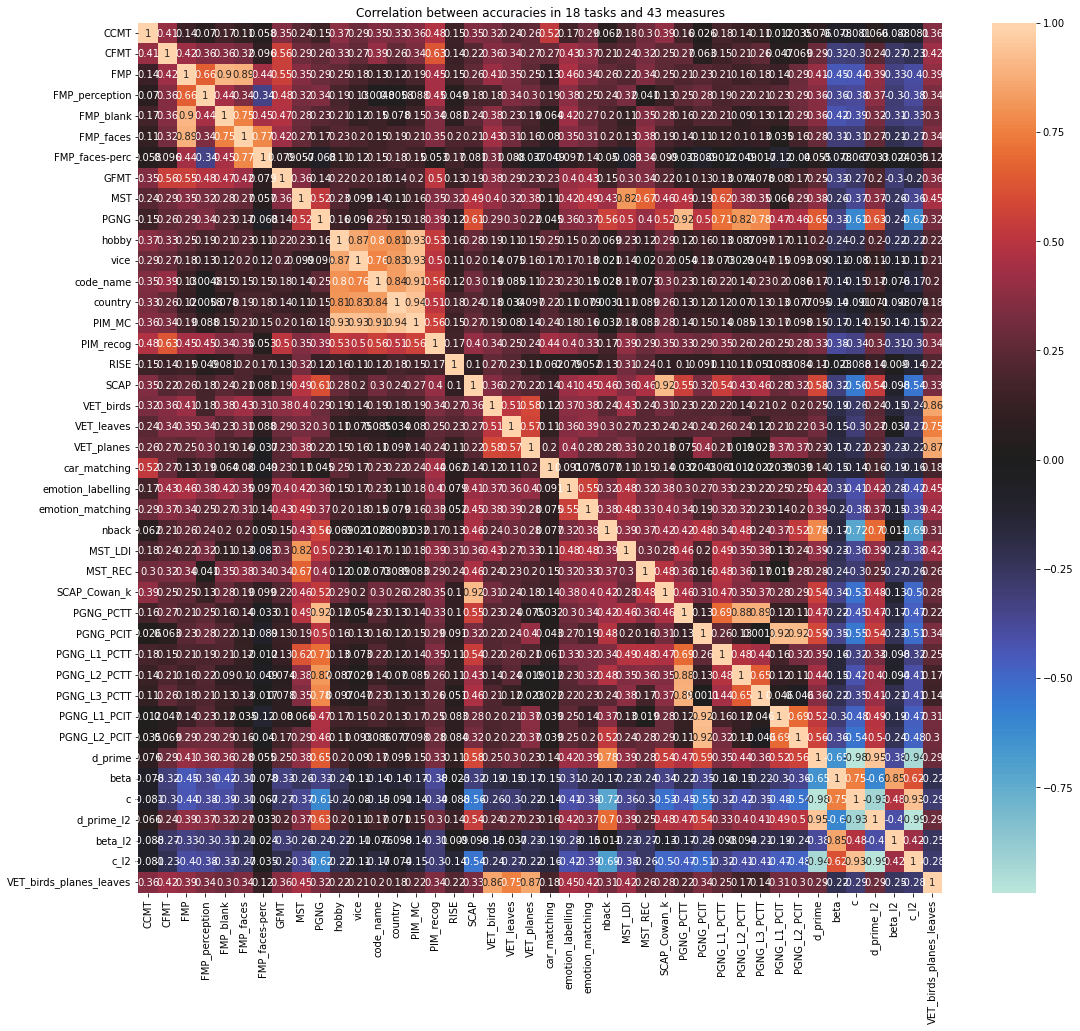

In [18]:
plt.figure(figsize=(18,16))
sns.heatmap(df_wide.corr(), annot=True, center=0)#, vmin=-.3)

plt.title(f'Correlation between accuracies in {len(dic_num_subjects_per_task.keys())} tasks and {len(df_wide.columns)} measures')
plt.show()

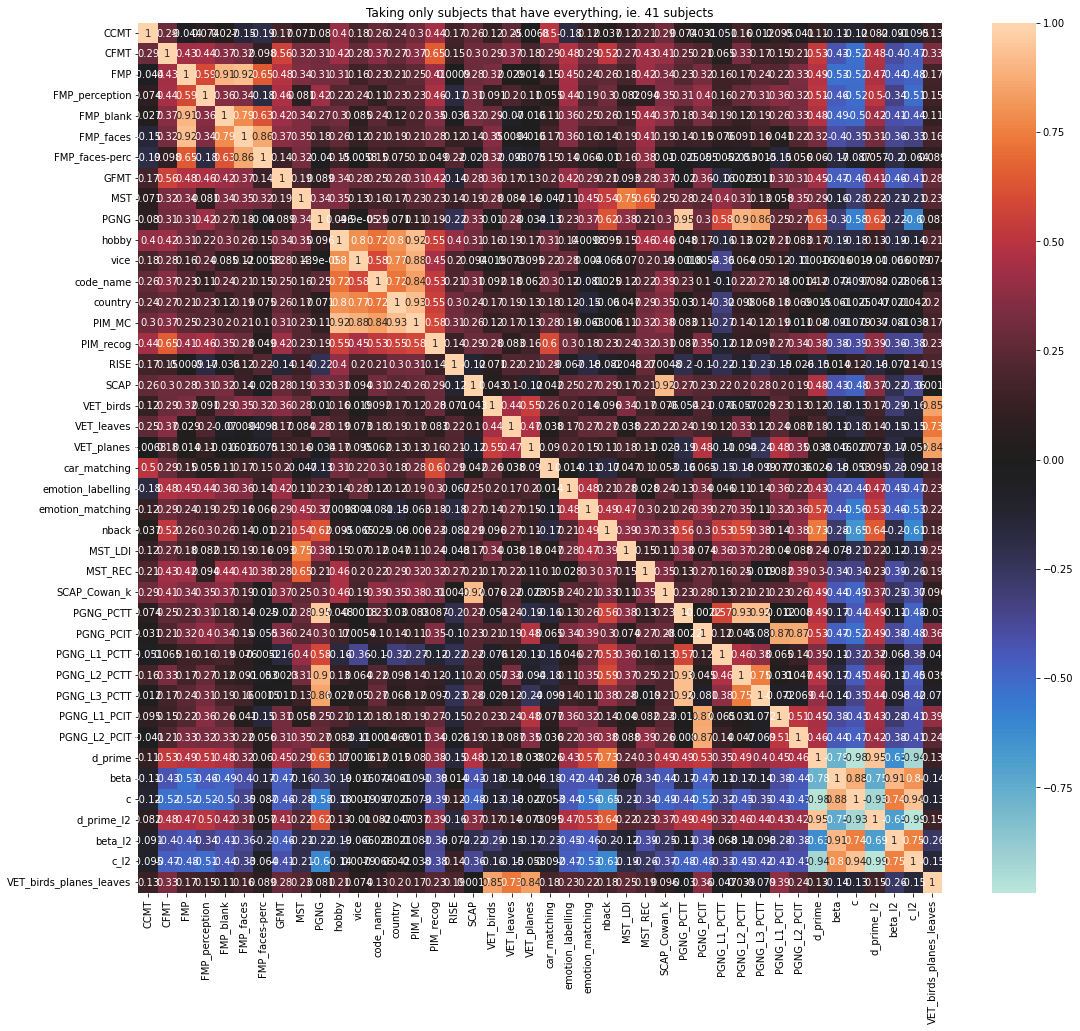

In [19]:
plt.figure(figsize=(18,16))
sns.heatmap(df_wide.dropna().corr(), annot=True, center=0)#, vmin=-.3)

plt.title(f'Taking only subjects that have everything, ie. {len(df_wide.dropna())} subjects')
plt.show()

In [20]:
# define files
files = [
 'CCMT_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'CFMT_longitudinal_reliability_3_chunks_psychofit_step5-fit.csv',
 'FMP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'GFMT_longitudinal_reliability_4_chunks_psychofit_step2-fit.csv',
 'MST_LDI_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv',
 'MST_REC_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv',
 'MST_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PGNG_PCIT_l2_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCIT_l3_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_l0_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_l1_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_l2_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_l3_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCIT_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'PGNG_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PIM_MC_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'RISE_longitudinal_reliability_1_chunks_psychofit_step1-fit.csv',
 'SCAP_Cowan_k_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'SCAP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'car_matching_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_matching_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'emotions_combined_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
#  'n_back_d_prime_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv',
#  'n_back_d_prime_level2_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
#  'nback_concat_d_prime_longitudinal_reliability_2_chunks_psychofit_step3-fit.csv',
 'nback_concat_level2_d_prime_longitudinal_reliability_2_chunks_psychofit_step3-fit.csv',
 'n_back_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
#  'Navon_longitudinal_reliability_1_chunks_psychofit_step2-fit.csv',
 'VET_birds_longitudinal_reliability_1_chunks_psychofit_step2-fit.csv',
 'VET_leaves_longitudinal_reliability_1_chunks_psychofit_step2-fit.csv',
 'VET_planes_longitudinal_reliability_1_chunks_psychofit_step2-fit.csv',
 'VET_birds_planes_leaves_longitudinal_reliability_3_chunks_psychofit_step5-fit.csv',
]

# define tasks
tasks = [x.split('_long')[0] for x in files]



 CCMT_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv
50
0.7142857142857143

 CFMT_longitudinal_reliability_3_chunks_psychofit_step5-fit.csv
70
0.6666666666666666

 FMP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv
135
0.75

 GFMT_longitudinal_reliability_4_chunks_psychofit_step2-fit.csv

 MST_LDI_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv
64
1.0

 MST_REC_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv
36
0.5625

 MST_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv
130
0.40625
->good match

 PGNG_PCIT_l2_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv

 PGNG_PCIT_l3_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv

 PGNG_PCTT_l0_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv

 PGNG_PCTT_l1_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv

 PGNG_PCTT_l2_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv
19
0.59375

 PGNG_PCTT_l3_longitudinal_reliability_2_chunks_psychofit_step1-fit.c

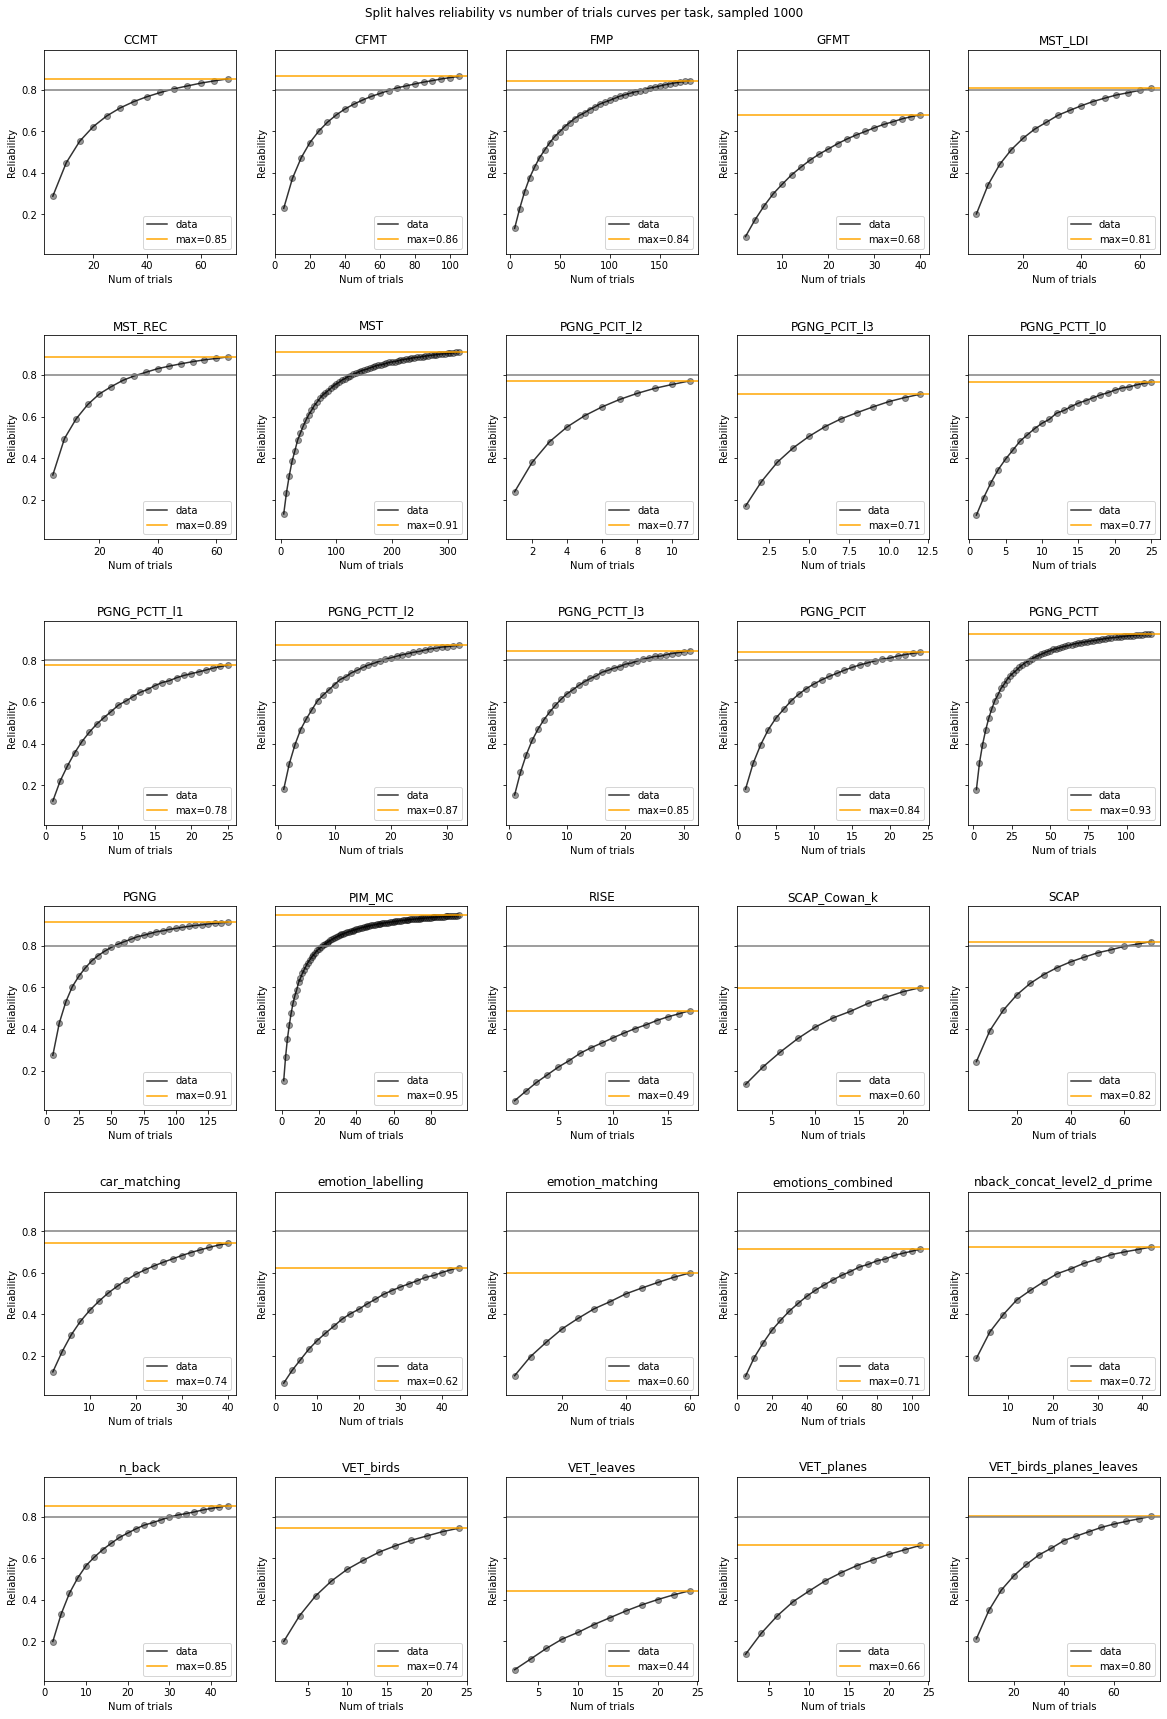

In [21]:
# # load dataset with num of trials per form 
# df_trials = pd.read_csv(os.path.join(path_results,'tasks-num_trials.csv'))

fig, axs = plt.subplots(6, 5, figsize=(20,30), sharey=True)
plt.subplots_adjust(hspace=0.4)


for file, ax in zip(files, axs.flatten()):
    df_tmp = None
    print('\n', file)
    df_tmp = pd.read_csv(os.path.join(path_curve_fit, file))
    
    ax.plot(df_tmp["n_trials"], df_tmp["reliability"], c='k', label="data", alpha=0.8)
    ax.scatter(df_tmp["n_trials"], df_tmp["reliability"], c='k', alpha=0.4)
    # add max label
    ax.axhline(df_tmp["reliability"].max(), c="orange", label=f"max={df_tmp['reliability'].max():.2f}")
    
    # check the reliability
    ax.axhline(0.8, c='grey')
    if not df_tmp.loc[df_tmp["reliability"]>0.8, "n_trials"].empty:
        print(df_tmp.loc[df_tmp["reliability"]>0.8, "n_trials"].min())
        print(df_tmp.loc[df_tmp["reliability"]>0.8, "n_trials"].min()/df_tmp["n_trials"].max())
        if df_tmp.loc[df_tmp["reliability"]>0.8, "n_trials"].min()/df_tmp["n_trials"].max()<1/3:
            print('->perfect match')
        elif df_tmp.loc[df_tmp["reliability"]>0.8, "n_trials"].min()/df_tmp["n_trials"].max()<0.5:
            print('->good match')
  
    ax.set_title(file.split('_long')[0])
    ax.set_xlabel("Num of trials")
    ax.set_ylabel("Reliability")
    
    ax.legend(loc="lower right")
    
plt.suptitle("Split halves reliability vs number of trials curves per task, sampled 1000", y=.9)

plt.show()

# Change reliability
[top](#top)

Make a distribution of correlations when reliability of both is the same and equal to 90, 80, ...

--- 
  
  

### Fit the curves and find needed number of trials
[top](#top)

For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.
For model Model(hyperbolic_fit) taking 1 param.


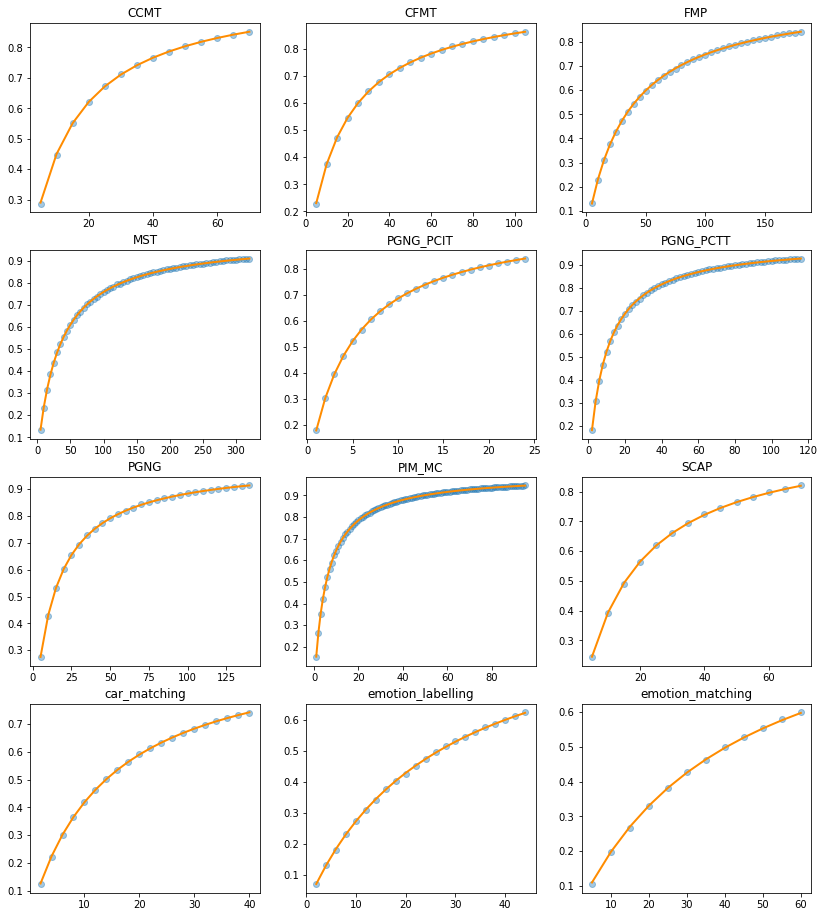

,task,model_name,bic,aic,chi_sq,a,n_trials
0,CCMT,Model(hyperbolic_fit),-187.719072,-188.358129,0.000017,12.195325,70.0
0,CFMT,Model(hyperbolic_fit),-295.115799,-296.160321,0.000014,16.657467,105.0
0,FMP,Model(hyperbolic_fit),-480.946940,-482.530459,0.000051,33.471578,180.0
0,MST,Model(hyperbolic_fit),-831.437865,-833.596748,0.000137,31.965846,320.0
0,PGNG_PCIT,Model(hyperbolic_fit),-324.779615,-325.957669,0.000028,4.573194,24.0
0,PGNG_PCTT,Model(hyperbolic_fit),-768.994923,-771.055366,0.000094,9.105242,116.0
0,PGNG,Model(hyperbolic_fit),-375.875017,-377.207221,0.000037,13.182317,140.0
0,PIM_MC,Model(hyperbolic_fit),-1322.112452,-1324.666329,0.000082,5.477205,95.0
0,SCAP,Model(hyperbolic_fit),-180.536199,-181.175257,0.000029,15.397840,70.0
0,car_matching,Model(hyperbolic_fit),-260.736348,-261.732080,0.000038,13.884829,40.0


In [22]:
# define where to save
df_results_tasks_hyperbolic = pd.DataFrame(columns=["task", "model_name", "bic", "aic", "chi_sq"])

dic_results_tasks_hyperbolic = {}

# define files
files = [
 'CCMT_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'CFMT_longitudinal_reliability_3_chunks_psychofit_step5-fit.csv',
 'FMP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'MST_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PGNG_PCIT_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'PGNG_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PIM_MC_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'SCAP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'car_matching_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_matching_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
]

# define tasks
tasks = [x.split('_long')[0] for x in files]

# define a plot
fig, axs = plt.subplots(4,3, figsize=(14,16))

for file, task, ax in zip(files, tasks, axs.flatten()): 
    df_tmp=None
#     print(f"\n\n----------------\n  Fitting task {task} from file {file} ...\n")
    df_tmp = pd.read_csv(os.path.join(path_curve_fit,file))

    y = df_tmp["reliability"].values
    x = df_tmp["n_trials"].values



    # go over all the functions
    for (i,fx) in enumerate([hyperbolic_fit]):

        result = None
        gmodel = None
        
        # initiate the model
        gmodel = Model(fx, nan_policy='omit')

        # set params, it differs for different functions
        if len(gmodel.param_names)==1:
            params = gmodel.make_params(a=0.3)
            print(f"For model {gmodel.name} taking 1 param.")        

        elif len(gmodel.param_names)==2:
            if 'cdf_lognormal' in gmodel.name or 'cdf_normal' in gmodel.name:
                params = gmodel.make_params(mu=0.3, sigma=0.3)
            else:
                params = gmodel.make_params(a=0.3, b=0.3)
            print(f"For model {gmodel.name} taking 2 params.")
        elif len(gmodel.param_names)==3:
            params = gmodel.make_params(a=0.3, b=0.3, c=0)
            print(f"For model {gmodel.name} taking 3 params.")
        elif len(gmodel.param_names)==4:
            params = gmodel.make_params(a=0.3, b=0.3, c=0.3,d=0)
            print(f"For model {gmodel.name} taking 4 params.")

        if 'logit' in gmodel.name:
            x = df_tmp["n_trials"].values
            # normalise it to be in 0-1
            x = x/x.max()
        else:
            x = df_tmp["n_trials"].values

        # perform the fit
        try:
            result = gmodel.fit(y, params, x=x)
                    # save summary
            df_results_tasks_hyperbolic = df_results_tasks_hyperbolic.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": [result.model.name],
                    "bic": [result.bic],
                    "aic": [result.aic],
                    "chi_sq": [result.chisqr],
                    "a": [result.best_values["a"]],
#                     "sigma": [result.best_values["sigma"]],
                    "n_trials": [df_tmp["n_trials"].max()],
                    })
            )
            
            
        except ValueError:
            result = None
            # save summary
            df_results_tasks_hyperbolic = df_results_tasks_hyperbolic.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": [gmodel.name],
                    "bic": [None],
                    "aic": [None],
                    "chi_sq": [None],
#                     "mu": [result.best_values["mu"]],
#                     "sigma": [result.best_values["sigma"]],
                    })
            )

        # save results
        dic_results_tasks_hyperbolic[str(gmodel.name)+'--'+str(task)] = result
        
    # plot
    ax.plot(x, y, 'o', alpha=0.4)
    #     axs[i].plot(x, result.init_fit, '--', label='initial fit')
    ax.plot(x, result.best_fit, '-', label='best fit', lw=2, c='darkorange')
    ax.set_title(task)


plt.show()

df_results_tasks_hyperbolic

In [23]:
df_needed_trials = pd.DataFrame()

reliabilities = np.arange(0.2, 1, 0.05)

for row in df_results_tasks_hyperbolic[df_results_tasks_hyperbolic["model_name"]=='Model(hyperbolic_fit)'].iterrows():
    for thr in reliabilities:
        
        df_needed_trials = df_needed_trials.append(pd.DataFrame({
            'task': row[1]["task"],
            'fit': ['hyperbolic'],
            'thr': [thr],
            'trials needed': int(np.round((thr*row[1]["a"])/(1-thr))),
        }))        
        
df_needed_trials   

,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
...,...,...,...,...
0,emotion_matching,hyperbolic,0.75,121
0,emotion_matching,hyperbolic,0.80,162
0,emotion_matching,hyperbolic,0.85,229
0,emotion_matching,hyperbolic,0.90,364


## CCMT vs car matching distributions of correlations - high correlation
[top](#top)

In [24]:
# num_forms = 1
# n_trials_per_form_car_matching = 40
# n_trials_per_form_CCMT = 72

# load data
df_CCMT = [x for x in dataframe_list if x.task.str.contains('CCMT').all()][0]
df_car_matching = [x for x in dataframe_list if x.task.str.contains('car_matching').all()][0]


# find overlap
shared_car_matching_ccmt = list(set(df_CCMT.userID)&set(df_car_matching.userID))
print(f"There is {len(shared_car_matching_ccmt)} subject in both.")
N = len(shared_car_matching_ccmt)

# take only overlap
df_CCMT = df_CCMT[df_CCMT["userID"].isin(shared_car_matching_ccmt)].sort_values(by=["userID"]).reset_index(drop=True)
df_car_matching = df_car_matching[df_car_matching["userID"].isin(shared_car_matching_ccmt)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_CCMT["userID"].value_counts().unique()) == 1
total_n_trials_ccmt = df_CCMT["userID"].value_counts().unique()[0]
assert len(df_car_matching["userID"].value_counts().unique()) == 1
total_n_trials_car_matching = df_car_matching["userID"].value_counts().unique()[0]


There is 152 subject in both.


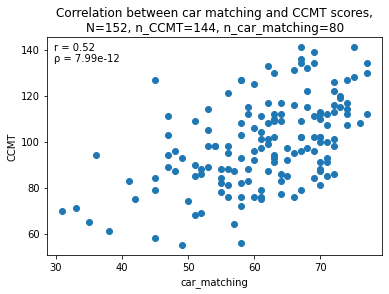

In [25]:
# plot the correlation
plt.figure()
plt.scatter(df_car_matching.groupby(['userID']).sum(), df_CCMT.groupby(['userID']).sum())

plt.ylabel('CCMT')
plt.xlabel('car_matching')
plt.title(f'Correlation between car matching and CCMT scores,\nN={len(shared_car_matching_ccmt)}, n_CCMT={total_n_trials_ccmt}, n_car_matching={total_n_trials_car_matching}')
label_correlation(df_car_matching.groupby(['userID']).sum().values, 
                  df_CCMT.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

In [26]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="CCMT")&(df_needed_trials["trials needed"]<=total_n_trials_ccmt), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="car_matching")&(df_needed_trials["trials needed"]<=total_n_trials_car_matching), "thr"].max())

df_needed_trials[df_needed_trials["thr"]<=max_rel_thr]

,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
...,...,...,...,...
0,emotion_matching,hyperbolic,0.65,75
0,emotion_matching,hyperbolic,0.70,94
0,emotion_matching,hyperbolic,0.75,121
0,emotion_matching,hyperbolic,0.80,162


In [27]:
df_needed_trials[df_needed_trials["task"].isin(["CCMT", "car_matching"])]

,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
0,CCMT,hyperbolic,0.45,10
0,CCMT,hyperbolic,0.50,12
0,CCMT,hyperbolic,0.55,15
0,CCMT,hyperbolic,0.60,18
0,CCMT,hyperbolic,0.65,23


#### Implement array calculations instead of using dataframes (much faster way)

In [28]:
# extract data from CCMT
CCMT_all_trials_reshaped = df_CCMT["correct"].values.reshape(df_CCMT["userID"].unique().size, total_n_trials_ccmt)

# check that indeed they are the same
for i, user in enumerate(df_CCMT["userID"].unique()):
    assert (df_CCMT.loc[df_CCMT["userID"]==user, "correct"].values == CCMT_all_trials_reshaped[i]).all()

In [29]:
# extract data from car_matching
car_matching_all_trials_reshaped = df_car_matching["correct"].values.reshape(df_car_matching["userID"].unique().size, total_n_trials_car_matching)

# check that indeed they are the same
for i, user in enumerate(df_car_matching["userID"].unique()):
    assert (df_car_matching.loc[df_car_matching["userID"]==user, "correct"].values == car_matching_all_trials_reshaped[i]).all()

In [30]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_ccmt = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="CCMT"), "trials needed"].values[0]
    n_car_matching  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="car_matching"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            rng_choice.choice(CCMT_all_trials_reshaped, size=n_ccmt, replace=False, axis=1).sum(axis=1),
            rng_choice.choice(car_matching_all_trials_reshaped, size=n_car_matching, replace=False, axis=1).sum(axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 14 thresholds and 1000 iterations.
Process took: 3.33 s which is 0.06 min.


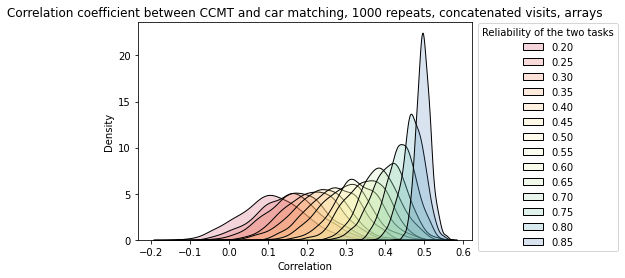

In [31]:
# colour = sns.color_palette("YlOrBr", n_colors=corr_distribution_array.shape[0])#, as_cmap=True)
colour = sns.color_palette("Spectral", n_colors=corr_distribution_array.shape[0])

for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
    sns.kdeplot(corr_distribution_array[j], label=f'{thr:.2f}', color=colour[j], multiple='stack', alpha=0.2)
    
plt.legend(title='Reliability of the two tasks', bbox_to_anchor=(1.45,1.02))
plt.title(f'Correlation coefficient between CCMT and car matching, {n_corr_repeats} repeats, concatenated visits, arrays')
plt.xlabel('Correlation')

plt.show()

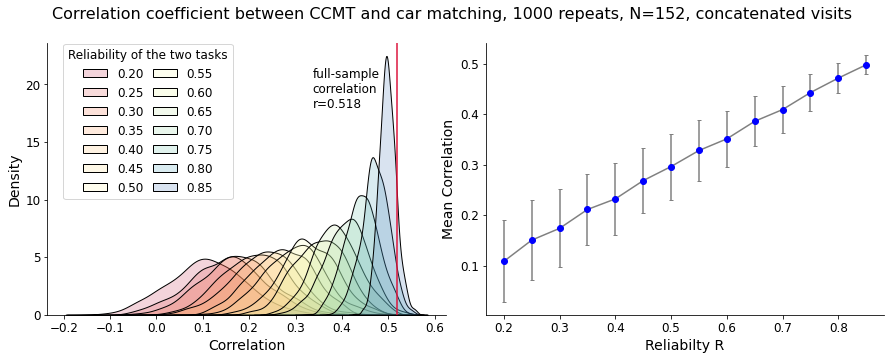

In [32]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between CCMT and car matching, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_car_matching.groupby(['userID']).sum().corrwith(df_CCMT.groupby(['userID']).sum())[0],
                           y_l=18, x_l=0.65
                          )

In [33]:
# save all the arrays
test = 'CCMT-car-matching'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_car_matching.groupby(['userID']).sum().corrwith(df_CCMT.groupby(['userID']).sum()))
        )

## PGNG vs car matching distributions of correlations - low correlation
[top](#top)

In [34]:
# num_forms = 1
# n_trials_per_form_car_matching = 40
# n_trials_per_form_PGNG = 144

# load data
df_PGNG = [x for x in dataframe_list if x.task.str.contains('PGNG').all()][0]
df_car_matching = [x for x in dataframe_list if x.task.str.contains('car_matching').all()][0]


# find overlap
shared_car_matching_PGNG = list(set(df_PGNG.userID)&set(df_car_matching.userID))
print(f"There is {len(shared_car_matching_PGNG)} subject in both.")
N = len(shared_car_matching_PGNG)

# take only overlap
df_PGNG = df_PGNG.loc[df_PGNG["userID"].isin(shared_car_matching_PGNG), ["userID", "correct"]].sort_values(by=["userID"]).reset_index(drop=True)
df_car_matching = df_car_matching[df_car_matching["userID"].isin(shared_car_matching_PGNG)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_PGNG["userID"].value_counts().unique()) == 1
total_n_trials_PGNG = df_PGNG["userID"].value_counts().unique()[0]
assert len(df_car_matching["userID"].value_counts().unique()) == 1
total_n_trials_car_matching = df_car_matching["userID"].value_counts().unique()[0]

There is 147 subject in both.


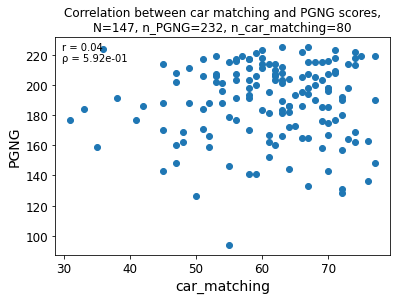

In [35]:
# plot the correlation
plt.figure()
plt.scatter(df_car_matching.groupby(['userID']).sum(), df_PGNG.groupby(['userID']).sum())

plt.ylabel('PGNG')
plt.xlabel('car_matching')
plt.title(f'Correlation between car matching and PGNG scores,\nN={len(shared_car_matching_PGNG)}, n_PGNG={total_n_trials_PGNG}, n_car_matching={total_n_trials_car_matching}')
label_correlation(df_car_matching.groupby(['userID']).sum().values, 
                  df_PGNG.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

In [36]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="PGNG")&(df_needed_trials["trials needed"]<=total_n_trials_PGNG), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="car_matching")&(df_needed_trials["trials needed"]<=total_n_trials_car_matching), "thr"].max())

df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)&(df_needed_trials["task"].isin(["PGNG", "car_matching"]))]
                                                             

,task,fit,thr,trials needed
0,PGNG,hyperbolic,0.20,3
0,PGNG,hyperbolic,0.25,4
0,PGNG,hyperbolic,0.30,6
0,PGNG,hyperbolic,0.35,7
0,PGNG,hyperbolic,0.40,9
0,PGNG,hyperbolic,0.45,11
0,PGNG,hyperbolic,0.50,13
0,PGNG,hyperbolic,0.55,16
0,PGNG,hyperbolic,0.60,20
0,PGNG,hyperbolic,0.65,24


In [37]:
# extract data from PGNG
PGNG_all_trials_reshaped = df_PGNG["correct"].values.reshape(df_PGNG["userID"].unique().size, total_n_trials_PGNG)

# check that indeed they are the same
for i, user in enumerate(df_PGNG["userID"].unique()):
    assert (df_PGNG.loc[df_PGNG["userID"]==user, "correct"].values == PGNG_all_trials_reshaped[i]).all()

# extract data from car_matching
car_matching_all_trials_reshaped = df_car_matching["correct"].values.reshape(df_car_matching["userID"].unique().size, total_n_trials_car_matching)

# check that indeed they are the same
for i, user in enumerate(df_car_matching["userID"].unique()):
    assert (df_car_matching.loc[df_car_matching["userID"]==user, "correct"].values == car_matching_all_trials_reshaped[i]).all()


In [38]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_PGNG = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PGNG"), "trials needed"].values[0]
    n_car_matching  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="car_matching"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            rng_choice.choice(PGNG_all_trials_reshaped, size=n_PGNG, replace=False, axis=1).sum(axis=1),
            rng_choice.choice(car_matching_all_trials_reshaped, size=n_car_matching, replace=False, axis=1).sum(axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")

Taking 14 thresholds and 1000 iterations.
Process took: 3.13 s which is 0.05 min.


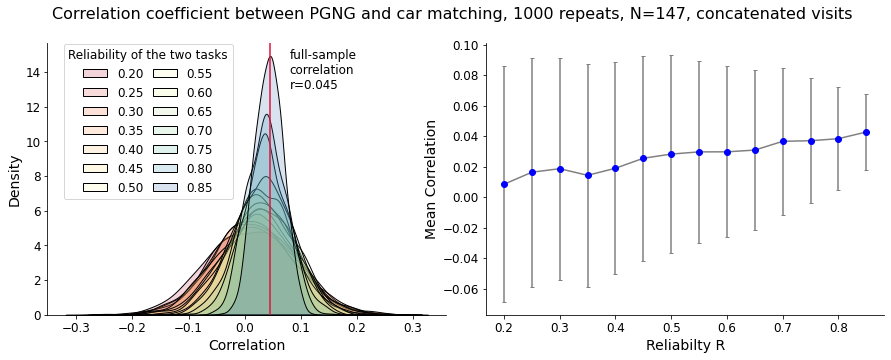

In [39]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between PGNG and car matching, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_car_matching.groupby(['userID']).sum().corrwith(df_PGNG.groupby(['userID']).sum())[0],
                           y_l=13, x_l=1.8
                          )

In [40]:
# save all the arrays
test = 'PGNG-car-matching'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_car_matching.groupby(['userID']).sum().corrwith(df_PGNG.groupby(['userID']).sum()))
        )

## CCMT vs SCAP distributions of correlations
[top](#top)

In [41]:
# num_forms = 2
# n_trials_per_form_SCAP = 72
# n_trials_per_form_CCMT = 72

# load data
df_CCMT = [x for x in dataframe_list if x.task.str.contains('CCMT').all()][0]
df_SCAP = [x for x in dataframe_list if x.task.str.contains('SCAP').all()][0]


# find overlap
shared_SCAP_CCMT = list(set(df_CCMT.userID)&set(df_SCAP.userID))
print(f"There is {len(shared_SCAP_CCMT)} subject in both.")
N = len(shared_SCAP_CCMT)

# take only overlap
df_CCMT = df_CCMT.loc[df_CCMT["userID"].isin(shared_SCAP_CCMT)].sort_values(by=["userID"]).reset_index(drop=True)
df_SCAP = df_SCAP.loc[df_SCAP["userID"].isin(shared_SCAP_CCMT), ["userID", "correct"]].sort_values(by=["userID"]).reset_index(drop=True)


There is 149 subject in both.


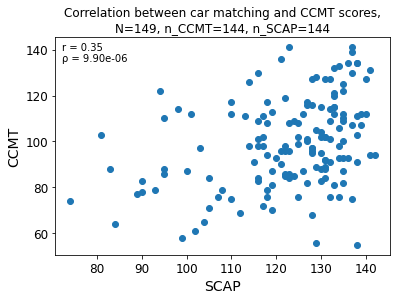

In [42]:
# get n trials
assert len(df_CCMT["userID"].value_counts().unique()) == 1
total_n_trials_CCMT = df_CCMT["userID"].value_counts().unique()[0]
assert len(df_SCAP["userID"].value_counts().unique()) == 1
total_n_trials_SCAP = df_SCAP["userID"].value_counts().unique()[0]

# plot the correlation
plt.figure()
plt.scatter(df_SCAP.groupby(['userID']).sum(), df_CCMT.groupby(['userID']).sum())

plt.ylabel('CCMT')
plt.xlabel('SCAP')
plt.title(f'Correlation between car matching and CCMT scores,\nN={len(shared_SCAP_CCMT)}, n_CCMT={total_n_trials_CCMT}, n_SCAP={total_n_trials_SCAP}')
label_correlation(df_SCAP.groupby(['userID']).sum().values, 
                  df_CCMT.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

In [43]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="CCMT")&(df_needed_trials["trials needed"]<=total_n_trials_CCMT), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="SCAP")&(df_needed_trials["trials needed"]<=total_n_trials_SCAP), "thr"].max())

df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)&(df_needed_trials["task"].isin(["CCMT", "SCAP"]))]


,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
0,CCMT,hyperbolic,0.45,10
0,CCMT,hyperbolic,0.50,12
0,CCMT,hyperbolic,0.55,15
0,CCMT,hyperbolic,0.60,18
0,CCMT,hyperbolic,0.65,23


In [44]:
### much faster way

# extract data from CCMT
CCMT_all_trials_reshaped = df_CCMT["correct"].values.reshape(df_CCMT["userID"].unique().size, total_n_trials_CCMT)

# check that indeed they are the same
for i, user in enumerate(df_CCMT["userID"].unique()):
    assert (df_CCMT.loc[df_CCMT["userID"]==user, "correct"].values == CCMT_all_trials_reshaped[i]).all()

# extract data from SCAP
SCAP_all_trials_reshaped = df_SCAP["correct"].values.reshape(df_SCAP["userID"].unique().size, total_n_trials_SCAP)

# check that indeed they are the same
for i, user in enumerate(df_SCAP["userID"].unique()):
#     assert (df_SCAP.loc[df_SCAP["userID"]==user, "correct"].values == SCAP_all_trials_reshaped[i]).all()
    # deal with nans
    assert np.allclose(df_SCAP.loc[df_SCAP["userID"]==user, "correct"].values, SCAP_all_trials_reshaped[i], equal_nan=True)

In [45]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_CCMT = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="CCMT"), "trials needed"].values[0]
    n_SCAP  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="SCAP"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            np.nanmean(rng_choice.choice(CCMT_all_trials_reshaped, size=n_CCMT, replace=False, axis=1), axis=1),
            np.nanmean(rng_choice.choice(SCAP_all_trials_reshaped, size=n_SCAP, replace=False, axis=1), axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 15 thresholds and 1000 iterations.


/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_25994/221820349.py:24: RuntimeWarning: Mean of empty slice
  np.nanmean(rng_choice.choice(SCAP_all_trials_reshaped, size=n_SCAP, replace=False, axis=1), axis=1)


Process took: 5.53 s which is 0.09 min.


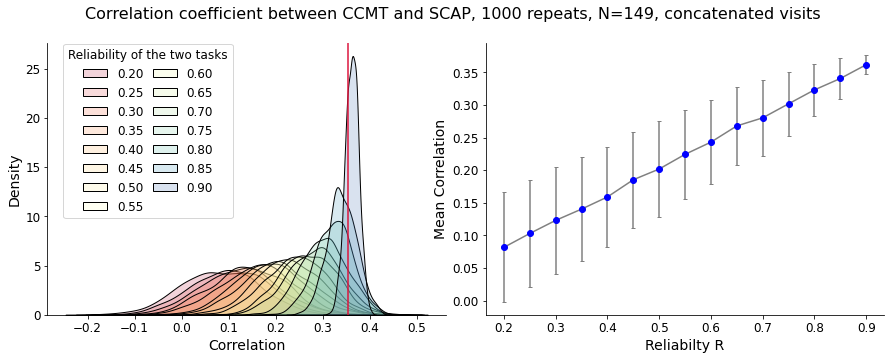

In [46]:
# # colour = sns.color_palette("YlOrBr", n_colors=corr_distribution_array.shape[0])#, as_cmap=True)
# colour = sns.color_palette("Spectral", n_colors=corr_distribution_array.shape[0])

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
#     sns.kdeplot(corr_distribution_array[j], label=f'{thr:.2f}', color=colour[j], multiple='stack', alpha=0.2)
    
# plt.legend(title='Reliability of the two tasks', bbox_to_anchor=(1.45,1.02))
# plt.title(f'Correlation coefficient between CCMT and car matching, {n_corr_repeats} repeats, concatenated visits, arrays')
# plt.xlabel('Correlation')

# plt.show()

plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between CCMT and SCAP, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_SCAP.groupby(['userID']).sum().corrwith(df_CCMT.groupby(['userID']).sum())[0],
                           y_l=13, x_l=1.8
                          )



#### Run it only up to 0.85 to be consistent with the other two paper figures

In [47]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

max_rel_thr = 0.85

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_CCMT = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="CCMT"), "trials needed"].values[0]
    n_SCAP  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="SCAP"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            np.nanmean(rng_choice.choice(CCMT_all_trials_reshaped, size=n_CCMT, replace=False, axis=1), axis=1),
            np.nanmean(rng_choice.choice(SCAP_all_trials_reshaped, size=n_SCAP, replace=False, axis=1), axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 14 thresholds and 1000 iterations.


/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_25994/269251418.py:26: RuntimeWarning: Mean of empty slice
  np.nanmean(rng_choice.choice(SCAP_all_trials_reshaped, size=n_SCAP, replace=False, axis=1), axis=1)


Process took: 5.04 s which is 0.08 min.


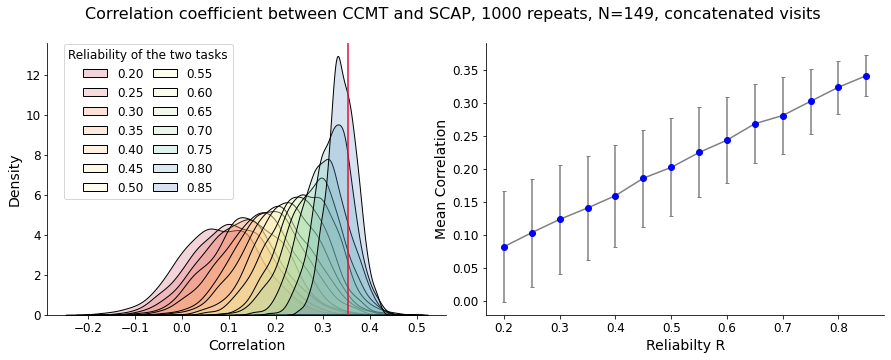

In [48]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between CCMT and SCAP, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_SCAP.groupby(['userID']).sum().corrwith(df_CCMT.groupby(['userID']).sum())[0],
                           y_l=13, x_l=1.8
                          )

In [49]:
# save all the arrays
test = 'CCMT-SCAP'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_SCAP.groupby(['userID']).sum().corrwith(df_CCMT.groupby(['userID']).sum()))
        )

---

## Other examples
[top](#top)

## CFMT vs MST distributions of correlations
[top](#top)

Make a distribution of correlations when reliability of both is the same and equal to 90, 80, ...

### Get the correlation
[top](#top)

There is 74 subject in both.


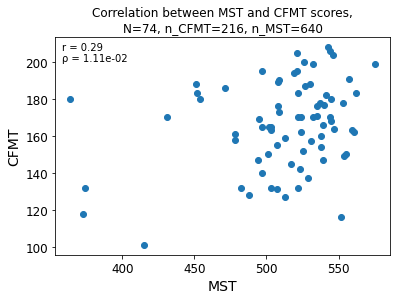

In [50]:
num_forms = 2
n_trials_per_form_MST = 320
n_trials_per_form_CFMT = 72

# load data
df_CFMT = [x for x in dataframe_list if x.task.str.contains('CFMT').all()][0]
df_MST = [x for x in dataframe_list if x.task.str.contains('MST').all()][0]

# drop the people who do not have two full sets -- TODO, decide, maybe can be filled
df_MST = df_MST[df_MST["userID"].isin(df_MST.userID.value_counts()[df_MST.userID.value_counts()==num_forms*n_trials_per_form_MST].keys())]


# find overlap
shared_mst_cfmt = list(set(df_CFMT.userID)&set(df_MST.userID))
print(f"There is {len(shared_mst_cfmt)} subject in both.")
N = len(shared_mst_cfmt)

# take only overlap
df_CFMT = df_CFMT[df_CFMT["userID"].isin(shared_mst_cfmt)].sort_values(by=["userID"]).reset_index(drop=True)
df_MST = df_MST[df_MST["userID"].isin(shared_mst_cfmt)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_CFMT["userID"].value_counts().unique()) == 1
total_n_trials_cfmt = df_CFMT["userID"].value_counts().unique()[0]
assert len(df_MST["userID"].value_counts().unique()) == 1
total_n_trials_mst = df_MST["userID"].value_counts().unique()[0]

# plot the correlation
plt.figure()
plt.scatter(df_MST.groupby(['userID']).sum(), df_CFMT.groupby(['userID']).sum())

plt.ylabel('CFMT')
plt.xlabel('MST')
plt.title(f'Correlation between MST and CFMT scores,\nN={len(shared_mst_cfmt)}, n_CFMT={total_n_trials_cfmt}, n_MST={total_n_trials_mst}')
label_correlation(df_MST.groupby(['userID']).sum().values, 
                  df_CFMT.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

In [51]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="CFMT")&(df_needed_trials["trials needed"]<=total_n_trials_cfmt), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="MST")&(df_needed_trials["trials needed"]<=total_n_trials_mst), "thr"].max())

df_needed_trials[df_needed_trials["thr"]<=max_rel_thr]

,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
...,...,...,...,...
0,emotion_matching,hyperbolic,0.70,94
0,emotion_matching,hyperbolic,0.75,121
0,emotion_matching,hyperbolic,0.80,162
0,emotion_matching,hyperbolic,0.85,229


#### Extract data

In [52]:
# extract data from CFMT
CFMT_all_trials_reshaped = df_CFMT["correct"].values.reshape(df_CFMT["userID"].unique().size, total_n_trials_cfmt)

# check that indeed they are the same
for i, user in enumerate(df_CFMT["userID"].unique()):
    assert (df_CFMT.loc[df_CFMT["userID"]==user, "correct"].values == CFMT_all_trials_reshaped[i]).all()
    

# extract data from MST
MST_all_trials_reshaped = df_MST["correct"].values.reshape(df_MST["userID"].unique().size, total_n_trials_mst)

# check that indeed they are the same
for i, user in enumerate(df_MST["userID"].unique()):
    assert (df_MST.loc[df_MST["userID"]==user, "correct"].values == MST_all_trials_reshaped[i]).all()

In [53]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_cfmt = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="CFMT"), "trials needed"].values[0]
    n_mst  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="MST"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            rng_choice.choice(CFMT_all_trials_reshaped, size=n_cfmt, replace=False, axis=1).sum(axis=1),
            rng_choice.choice(MST_all_trials_reshaped, size=n_mst, replace=False, axis=1).sum(axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 15 thresholds and 1000 iterations.
Process took: 3.53 s which is 0.06 min.


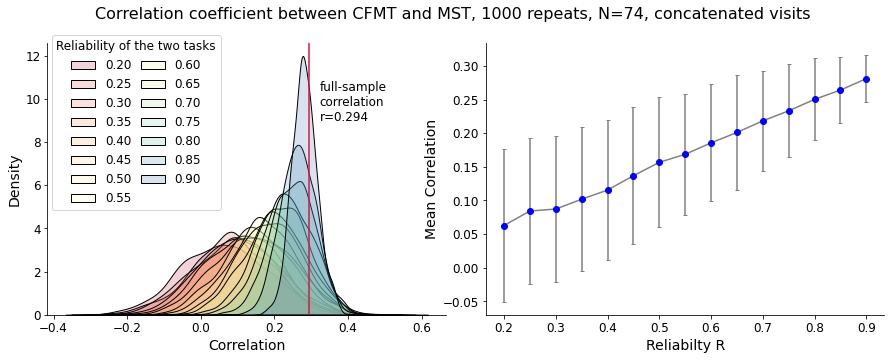

In [54]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between CFMT and MST, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.45,1.05),
                           real_corr=df_MST.groupby(['userID']).sum().corrwith(df_CFMT.groupby(['userID']).sum())[0],
                           y_l=9
                          )

In [55]:
# save all the arrays
test = 'CFMT-MST'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_MST.groupby(['userID']).sum().corrwith(df_CFMT.groupby(['userID']).sum()))
        )

## CFMT vs FMP distributions of correlations
[top](#top)

There is 101 subject in both.


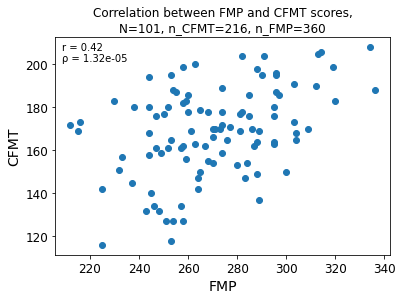

In [56]:
# num_forms = 1
n_trials_per_form_FMP = 180
n_trials_per_form_CFMT = 72

# load data
df_CFMT = [x for x in dataframe_list if x.task.str.contains('CFMT').all()][0]
df_FMP = [x for x in dataframe_list if x.task.str.contains('FMP').all()][0]


# find overlap
shared_fmp_cfmt = list(set(df_CFMT.userID)&set(df_FMP.userID))
print(f"There is {len(shared_fmp_cfmt)} subject in both.")
N = len(shared_fmp_cfmt)

# take only overlap
df_CFMT = df_CFMT.loc[df_CFMT["userID"].isin(shared_fmp_cfmt)].sort_values(by=["userID"]).reset_index(drop=True)
df_FMP = df_FMP.loc[df_FMP["userID"].isin(shared_fmp_cfmt), ['userID', 'correct']].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_CFMT["userID"].value_counts().unique()) == 1
total_n_trials_cfmt = df_CFMT["userID"].value_counts().unique()[0]
assert len(df_FMP["userID"].value_counts().unique()) == 1
total_n_trials_fmp = df_FMP["userID"].value_counts().unique()[0]

# plot the correlation
plt.figure()
plt.scatter(df_FMP.groupby(['userID']).sum(), df_CFMT.groupby(['userID']).sum())

plt.ylabel('CFMT')
plt.xlabel('FMP')
plt.title(f'Correlation between FMP and CFMT scores,\nN={len(shared_fmp_cfmt)}, n_CFMT={total_n_trials_cfmt}, n_FMP={total_n_trials_fmp}')
label_correlation(df_FMP.groupby(['userID']).sum().values, 
                  df_CFMT.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

### Get the correlation
[top](#top)

In [57]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="CFMT")&(df_needed_trials["trials needed"]<=total_n_trials_cfmt), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="FMP")&(df_needed_trials["trials needed"]<=total_n_trials_fmp), "thr"].max())

df_needed_trials[df_needed_trials["thr"]<=max_rel_thr]

,task,fit,thr,trials needed
0,CCMT,hyperbolic,0.20,3
0,CCMT,hyperbolic,0.25,4
0,CCMT,hyperbolic,0.30,5
0,CCMT,hyperbolic,0.35,7
0,CCMT,hyperbolic,0.40,8
...,...,...,...,...
0,emotion_matching,hyperbolic,0.70,94
0,emotion_matching,hyperbolic,0.75,121
0,emotion_matching,hyperbolic,0.80,162
0,emotion_matching,hyperbolic,0.85,229


#### Extract data

In [58]:
# extract data from FMP
FMP_all_trials_reshaped = df_FMP["correct"].values.reshape(df_FMP["userID"].unique().size, total_n_trials_fmp)

# check that indeed they are the same
for i, user in enumerate(df_FMP["userID"].unique()):
#     assert (df_FMP.loc[df_FMP["userID"]==user, "correct"].values == FMP_all_trials_reshaped[i]).all()
    # deal with nans
    assert np.allclose(df_FMP.loc[df_FMP["userID"]==user, "correct"].values, FMP_all_trials_reshaped[i], equal_nan=True)

    
# extract data from CFMT
CFMT_all_trials_reshaped = df_CFMT["correct"].values.reshape(df_CFMT["userID"].unique().size, total_n_trials_cfmt)

# check that indeed they are the same
for i, user in enumerate(df_CFMT["userID"].unique()):
    assert (df_CFMT.loc[df_CFMT["userID"]==user, "correct"].values == CFMT_all_trials_reshaped[i]).all()


In [59]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_CFMT = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="CFMT"), "trials needed"].values[0]
    n_FMP  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="FMP"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            np.nanmean(rng_choice.choice(CFMT_all_trials_reshaped, size=n_CFMT, replace=False, axis=1), axis=1),
            np.nanmean(rng_choice.choice(FMP_all_trials_reshaped, size=n_FMP, replace=False, axis=1), axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 15 thresholds and 1000 iterations.
Process took: 6.25 s which is 0.10 min.


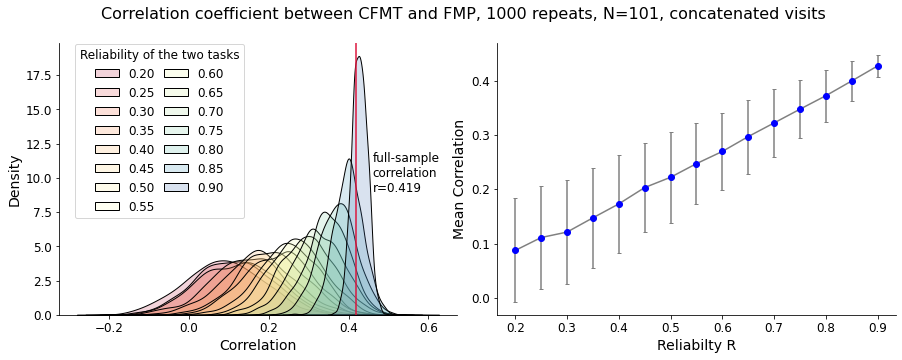

In [60]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between CFMT and FMP, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_FMP.groupby(['userID']).sum().corrwith(df_CFMT.groupby(['userID']).sum())[0],
                           y_l=9
                          )

In [61]:
# save all the arrays
test = 'CFMT-FMP'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_FMP.groupby(['userID']).sum().corrwith(df_CFMT.groupby(['userID']).sum()))
        )

---

## Test scaling of the standard deviation depending on the number of trials taken
[top](#top)

Again this should check if what we see - shrinking of the variance -- is simply an artefact of limited sample size

### PIM MC and MST -- variance scaling
[top](#top)

This section should do the testing in a better way. Similarly to other parts, it should test both constrained and unconstrained dataset.

The requirement is to have two tasks that reach 0.8 reliability with half or less of the data. For those tasks then define:
* unconstrained dataset -- goes up to half of the number of trials. Then for each $L$, I take twice as many trials, $2L$, and from that I sample the $L$ and calculate the correlation.
* constrained -- goes up to 80 % of the data in each point, ie. take $1.25L$ and sample that.


In [62]:
num_forms = 2
n_trials_per_form_MST = 320
n_trials_per_form_PIM_MC = 24

# load data
df_PIM_MC = [x for x in dataframe_list if x.task.str.contains('PIM_MC').all()][0]
df_MST = [x for x in dataframe_list if x.task.str.contains('MST').all()][0]

# drop the people who do not have two full sets -- TODO, decide, maybe can be filled
df_MST = df_MST[df_MST["userID"].isin(df_MST.userID.value_counts()[df_MST.userID.value_counts()==num_forms*n_trials_per_form_MST].keys())]


# find overlap
shared_PIM_MC_MST_participants = list(set(df_PIM_MC.userID)&set(df_MST.userID))
print(f"There is {len(shared_PIM_MC_MST_participants)} subject in both.")
N = len(shared_PIM_MC_MST_participants)

# combine all MC measures in pim
df_PIM_MC = pd.concat(
    [df_PIM_MC[["userID",x]].rename(columns={x:"correct"}) for x in ["hobby", "vice", "code_name", "country"]]
)

# take only overlap
df_PIM_MC = df_PIM_MC[df_PIM_MC["userID"].isin(shared_PIM_MC_MST_participants)].sort_values(by=["userID"]).reset_index(drop=True)
df_MST = df_MST[df_MST["userID"].isin(shared_PIM_MC_MST_participants)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_PIM_MC["userID"].value_counts().unique()) == 1
total_n_trials_pim_mc = df_PIM_MC["userID"].value_counts().unique()[0]
assert len(df_MST["userID"].value_counts().unique()) == 1
total_n_trials_mst = df_MST["userID"].value_counts().unique()[0]



There is 75 subject in both.


In [63]:
### much faster way

# extract data from PIM_MC
PIM_MC_all_trials_reshaped = df_PIM_MC["correct"].values.reshape(df_PIM_MC["userID"].unique().size, total_n_trials_pim_mc)

# check that indeed they are the same
for i, user in enumerate(df_PIM_MC["userID"].unique()):
    assert (df_PIM_MC.loc[df_PIM_MC["userID"]==user, "correct"].values == PIM_MC_all_trials_reshaped[i]).all()

# extract data from MST
MST_all_trials_reshaped = df_MST["correct"].values.reshape(df_MST["userID"].unique().size, total_n_trials_mst)

# check that indeed they are the same
for i, user in enumerate(df_MST["userID"].unique()):
    assert (df_MST.loc[df_MST["userID"]==user, "correct"].values == MST_all_trials_reshaped[i]).all()


In [64]:
start = time.time()

# what percentage to sample
L_const = 1/0.8 # 80% of the dataset

# how many times sample and correlate
n_corr_repeats = 10**3


corr_distribution_array_constrained = np.zeros((len(reliabilities[reliabilities<0.8]), n_corr_repeats))
print(f"Taking {corr_distribution_array_constrained.shape[0]} thresholds and {corr_distribution_array_constrained.shape[1]} iterations.")

for j, thr in enumerate(reliabilities[reliabilities<0.8]):
    n_pim_mc = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PIM_MC"), "trials needed"].values[0]
    n_mst    = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="MST"), "trials needed"].values[0]
    print(f'For {thr:.2f} needed pim: {n_pim_mc}, needed mst: {n_mst}')
    
    # define size of restricted dataset
    r1_size = np.ceil(n_pim_mc*L_const).astype(int)
    r2_size = np.ceil(n_mst*L_const).astype(int)
    print(f'Percentage of the unconstrained dataset: \n{n_pim_mc/r1_size:.3f} and {n_mst/r2_size:.3f}\n')
    
    # define restricted dataset
    rng_restricted = np.random.default_rng(j)
    df_r1 = rng_restricted.choice(PIM_MC_all_trials_reshaped, size=r1_size, replace=False, axis=1)
    df_r2 = rng_restricted.choice(MST_all_trials_reshaped, size=r2_size, replace=False, axis=1)
    
    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j)

        # save correlation
        corr_distribution_array_constrained[j,i] = np.corrcoef(
            rng_choice.choice(df_r1, size=n_pim_mc, replace=False, axis=1).mean(axis=1), 
            rng_choice.choice(df_r2, size=n_mst, replace=False, axis=1).mean(axis=1))[0,1]

        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")

Taking 13 thresholds and 1000 iterations.
For 0.20 needed pim: 1, needed mst: 8
Percentage of the unconstrained dataset: 
0.500 and 0.800

For 0.25 needed pim: 2, needed mst: 11
Percentage of the unconstrained dataset: 
0.667 and 0.786

For 0.30 needed pim: 2, needed mst: 14
Percentage of the unconstrained dataset: 
0.667 and 0.778

For 0.35 needed pim: 3, needed mst: 17
Percentage of the unconstrained dataset: 
0.750 and 0.773

For 0.40 needed pim: 4, needed mst: 21
Percentage of the unconstrained dataset: 
0.800 and 0.778

For 0.45 needed pim: 4, needed mst: 26
Percentage of the unconstrained dataset: 
0.800 and 0.788

For 0.50 needed pim: 5, needed mst: 32
Percentage of the unconstrained dataset: 
0.714 and 0.800

For 0.55 needed pim: 7, needed mst: 39
Percentage of the unconstrained dataset: 
0.778 and 0.796

For 0.60 needed pim: 8, needed mst: 48
Percentage of the unconstrained dataset: 
0.800 and 0.800

For 0.65 needed pim: 10, needed mst: 59
Percentage of the unconstrained datas

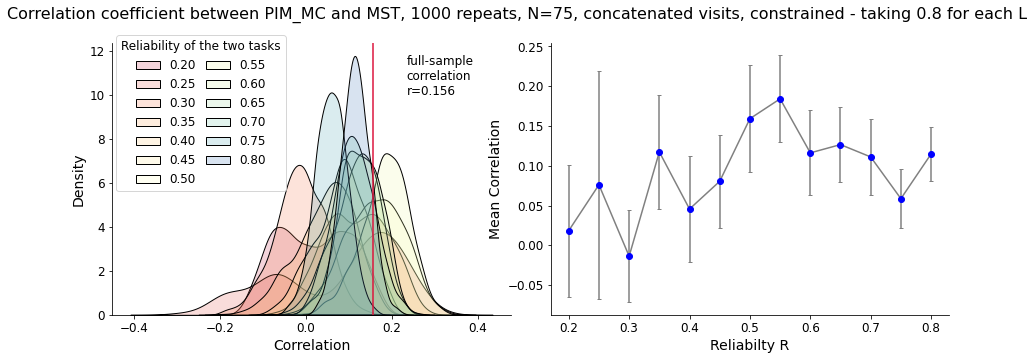

In [65]:
plot_RC_distributions_line(corr_distribution_array_constrained, df_needed_trials, 0.8, 
                           f'Correlation coefficient between PIM_MC and MST, {n_corr_repeats} repeats, N={N}, concatenated visits, constrained - taking 0.8 for each L',
                           legend_position=(.45,1.05),
                           real_corr=df_MST.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum())[0],
                           y_l=10, x_l=1.5
                          )

In [66]:
start = time.time()

# what percentage to sample
L_const = 2 # 50% of the dataset

# how many times sample and correlate
n_corr_repeats = 10**3


corr_distribution_array_unconstrained = np.zeros((len(reliabilities[reliabilities<0.8]), n_corr_repeats))
print(f"Taking {corr_distribution_array_unconstrained.shape[0]} thresholds and {corr_distribution_array_unconstrained.shape[1]} iterations.")

for j, thr in enumerate(reliabilities[reliabilities<0.8]):
    n_pim_mc = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PIM_MC"), "trials needed"].values[0]
    n_mst    = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="MST"), "trials needed"].values[0]
    print(f'For {thr:.2f} needed pim: {n_pim_mc}, needed mst: {n_mst}')
    
    # define size of restricted dataset
    r1_size = np.ceil(n_pim_mc*L_const).astype(int)
    r2_size = np.ceil(n_mst*L_const).astype(int)
    print(f'Percentage of the ununconstrained dataset: \n{n_pim_mc/r1_size:.3f} and {n_mst/r2_size:.3f}\n')
    
    # define restricted dataset
    rng_restricted = np.random.default_rng(j)
    df_r1 = rng_restricted.choice(PIM_MC_all_trials_reshaped, size=r1_size, replace=False, axis=1)
    df_r2 = rng_restricted.choice(MST_all_trials_reshaped, size=r2_size, replace=False, axis=1)
    
    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j)

        # save correlation
        corr_distribution_array_unconstrained[j,i] = np.corrcoef(
            rng_choice.choice(df_r1, size=n_pim_mc, replace=False, axis=1).mean(axis=1), 
            rng_choice.choice(df_r2, size=n_mst, replace=False, axis=1).mean(axis=1))[0,1]

        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")

Taking 13 thresholds and 1000 iterations.
For 0.20 needed pim: 1, needed mst: 8
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.25 needed pim: 2, needed mst: 11
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.30 needed pim: 2, needed mst: 14
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.35 needed pim: 3, needed mst: 17
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.40 needed pim: 4, needed mst: 21
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.45 needed pim: 4, needed mst: 26
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.50 needed pim: 5, needed mst: 32
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.55 needed pim: 7, needed mst: 39
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.60 needed pim: 8, needed mst: 48
Percentage of the ununconstrained dataset: 
0.500 and 0.500

For 0.65 needed pim: 10, needed mst: 59
Percentage of the u

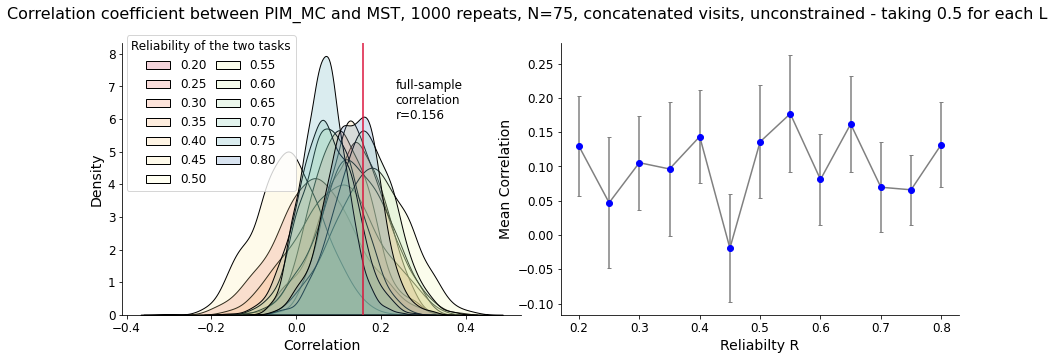

In [67]:
plot_RC_distributions_line(corr_distribution_array_unconstrained, df_needed_trials, 0.8, 
                           f'Correlation coefficient between PIM_MC and MST, {n_corr_repeats} repeats, N={N}, concatenated visits, unconstrained - taking 0.5 for each L',
                           legend_position=(.45,1.05),
                           real_corr=df_MST.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum())[0],
                           y_l=6, x_l=1.5
                          )

Text(0.5, 1.0, 'Standard deviation of the correlation distribution')

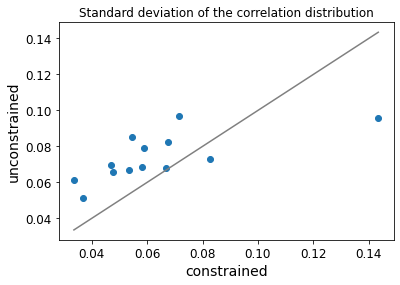

In [68]:
plt.scatter(corr_distribution_array_constrained.std(axis=1), corr_distribution_array_unconstrained.std(axis=1))
x_min = min(corr_distribution_array_constrained.std(axis=1).min(), corr_distribution_array_unconstrained.std(axis=1).min())
x_max = max(corr_distribution_array_constrained.std(axis=1).max(), corr_distribution_array_unconstrained.std(axis=1).max())
plt.plot(np.linspace(x_min,x_max), np.linspace(x_min, x_max), c='grey')

plt.xlabel('constrained')
plt.ylabel('unconstrained')
plt.title('Standard deviation of the correlation distribution')

The following plot is nice but noisy. To overcome that issue and to avoid similar problems that we encounter when going to high reliabilities, create a new synthetic dataset that will follow those two tasks and check it with simulations (several runs). To see this notebook, go to:

`estimate_shrinking_error.ipynb`


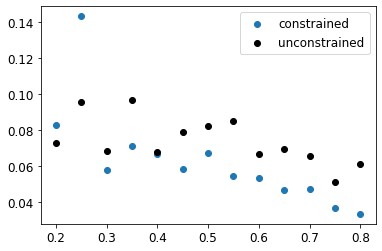

In [69]:
plt.scatter(reliabilities[reliabilities<0.8], corr_distribution_array_constrained.std(axis=1), label='constrained')
plt.scatter(reliabilities[reliabilities<0.8], corr_distribution_array_unconstrained.std(axis=1), c='k', label='unconstrained')

plt.legend()

In [70]:
# save all the arrays
test = 'PIM_MC-MST'
np.savez(os.path.join(path_meaning, f'{test}_shrinking_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array_constrained=corr_distribution_array_constrained, 
         corr_distribution_array_unconstrained=corr_distribution_array_unconstrained, 
#          df_needed_trials = df_needed_trials,
#          max_rel_thr=np.array([max_rel_thr]), 
#          reliabilities=reliabilities[reliabilities<=max_rel_thr], 
         n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=df_MST.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum())[0]
        )

df_needed_trials.to_csv(os.path.join(path_meaning, f'{test}_needed_trials_N{N}_rep{n_corr_repeats}.csv'), index=False)


# save also the actual accuracies
df_PIM_MC.groupby(['userID']).mean().reset_index().merge(df_MST.groupby(['userID']).mean().reset_index(),
                                                      on='userID', suffixes=('_PIM_MC', '_MST')
                                                     ).to_csv(os.path.join(path_meaning, f'{test}_accuracy.csv'), index=False)


## Create examples of unreliable tasks
[top](#top)

## Emotion labelling vs emotion matching distributions of correlations
[top](#top)

In [71]:
# define manually num of trials
n_trials_per_form_emotion_matching = 65
num_forms = 2

# test="emotion_matching"
# # save the name so that we have easier job later
# test_names.append(test)

# load the first set
df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()!=65])#.keys()

# load the second set
df_emotion_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching_rep-cleaned_data.csv"))
df_emotion_matching_stand["correct"] = df_emotion_matching_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()!=100])#.keys()


######

# get names of stimulu
df_emotion_matching_stand["face1"] = df_emotion_matching_stand["face1"].str.split('/').str[-1]
df_emotion_matching_stand["face2"] = df_emotion_matching_stand["face2"].str.split('/').str[-1]
df_emotion_matching_stand["face3"] = df_emotion_matching_stand["face3"].str.split('/').str[-1]

# to be able to take the old trials only, here, I create a new variable "test" which is a combination of the 3 stimuli
# which uniquely determine a trial. Since the assignment of the stimuli to a column is random, we can simply compare.
# Therefore, I first combine the three cols, then sort values within this and convert it into a string. Using this
# string and userID, I then merge the two datasets --> that means that there are only the shared participants together
# with the overlapping trials
df_emotion_matching_stand["test"] = np.sort(df_emotion_matching_stand[["face1", "face2", "face3"]].values,axis=1).tolist()
df_emotion_matching["test"] = np.sort(df_emotion_matching[["face1", "face2", "face3"]].values,axis=1).tolist()

df_emotion_matching["test"]=df_emotion_matching["test"].apply(lambda x: ','.join(map(str, x)))
df_emotion_matching_stand["test"]=df_emotion_matching_stand["test"].apply(lambda x: ','.join(map(str, x)))

# merge the two dataframes to only take the intersection -- takes care of both userID and the shared target
df_merged = df_emotion_matching.merge(df_emotion_matching_stand, on=["userID", "test"])

# split it and make it into a long format, back, rename cols to be the same again
df_emotion_matching_concat = pd.concat([
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_x') or x=='userID']].rename(columns = lambda x: x.strip('_x')),
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_y') or x=='userID']].rename(columns = lambda x: x.strip('_y')),
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_matching_concat.userID.value_counts()[df_emotion_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form_emotion_matching])#.keys()
# this has for some reason 122

# //////

# define manually num of trials
n_trials_per_form_emotion_labelling = 48
num_forms = 2

# test="emotion_labelling"
# # save the name so that we have easier job later
# test_names.append(test)

# load the first set
df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()!=n_trials_per_form_emotion_matching])#.keys()

df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()


######

df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# get participants who have both data
shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# get target set of original stimuli
target_set = df_emotion_labelling.target.unique()

shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

df_emotion_labelling_concat = pd.concat([
    df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
    df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
                             (df_emotion_labelling["userID"].isin(shared_participants))].copy()
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_labelling_concat.userID.value_counts()[df_emotion_labelling_concat.userID.value_counts()!=num_forms*n_trials_per_form_emotion_labelling])#.keys()
# this has for some reason a different count

print(df_emotion_labelling_concat.userID.unique().size)
print(df_emotion_matching_concat.userID.unique().size)

shared_emotion_matching_emotion_labelling = list(set(df_emotion_labelling_concat['userID'])&set(df_emotion_matching_concat['userID']))

print("Total number of participants in combined emotions: ", len(shared_emotion_matching_emotion_labelling))


if 'RT' in df_emotion_matching_concat.columns:
    df_emotion_matching_concat.drop(columns='RT', inplace=True)
    
if 'RT' in df_emotion_labelling_concat.columns:
    df_emotion_labelling_concat.drop(columns='RT', inplace=True)

Test first set
Series([], Name: userID, dtype: int64)

Test second set
Series([], Name: userID, dtype: int64)

Test combined set
s_233    122
s_181    122
s_184    122
s_143    122
s_148    122
        ... 
s_166    122
s_210    122
s_200    122
s_120    122
s_126    122
Name: userID, Length: 161, dtype: int64
Test first set
s_233    48
s_43     48
s_236    48
s_45     48
s_161    48
         ..
s_226    48
s_15     48
s_166    48
s_98     48
s_121    48
Name: userID, Length: 242, dtype: int64

Test second set
Series([], Name: userID, dtype: int64)
Running all replicate studies with total 166 participants and 45 stimuli.

Test combined set
s_233    90
s_45     90
s_75     90
s_8      90
s_184    90
         ..
s_206    90
s_226    90
s_15     90
s_166    90
s_126    90
Name: userID, Length: 166, dtype: int64
166
161
Total number of participants in combined emotions:  152


In [72]:
N = len(shared_emotion_matching_emotion_labelling)

# take only overlap
df_emotion_labelling_concat = df_emotion_labelling_concat[df_emotion_labelling_concat["userID"].isin(shared_emotion_matching_emotion_labelling)].sort_values(by=["userID"]).reset_index(drop=True)
df_emotion_matching_concat = df_emotion_matching_concat[df_emotion_matching_concat["userID"].isin(shared_emotion_matching_emotion_labelling)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_emotion_labelling_concat["userID"].value_counts().unique()) == 1
total_n_trials_emotion_labelling_concat = df_emotion_labelling_concat["userID"].value_counts().unique()[0]
assert len(df_emotion_matching_concat["userID"].value_counts().unique()) == 1
total_n_trials_emotion_matching_concat = df_emotion_matching_concat["userID"].value_counts().unique()[0]

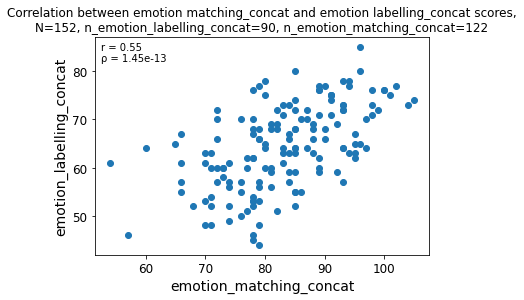

In [73]:
# plot the correlation
plt.figure()
plt.scatter(df_emotion_matching_concat[['userID', 'correct']].groupby(['userID']).sum(), 
            df_emotion_labelling_concat[['userID', 'correct']].groupby(['userID']).sum())

plt.ylabel('emotion_labelling_concat')
plt.xlabel('emotion_matching_concat')
plt.title(f'Correlation between emotion matching_concat and emotion labelling_concat scores,\nN={len(shared_emotion_matching_emotion_labelling)}, n_emotion_labelling_concat={total_n_trials_emotion_labelling_concat}, n_emotion_matching_concat={total_n_trials_emotion_matching_concat}')
label_correlation(df_emotion_matching_concat[['userID', 'correct']].groupby(['userID']).sum().values, 
                  df_emotion_labelling_concat[['userID', 'correct']].groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

In [74]:
# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="emotion_labelling")&(df_needed_trials["trials needed"]<=total_n_trials_emotion_labelling_concat), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="emotion_matching")&(df_needed_trials["trials needed"]<=total_n_trials_emotion_matching_concat), "thr"].max())

# df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)]
df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)&(df_needed_trials["task"].str.contains('emotion'))]

,task,fit,thr,trials needed
0,emotion_labelling,hyperbolic,0.20,7
0,emotion_labelling,hyperbolic,0.25,9
0,emotion_labelling,hyperbolic,0.30,11
0,emotion_labelling,hyperbolic,0.35,14
0,emotion_labelling,hyperbolic,0.40,18
0,emotion_labelling,hyperbolic,0.45,22
0,emotion_labelling,hyperbolic,0.50,27
0,emotion_labelling,hyperbolic,0.55,33
0,emotion_labelling,hyperbolic,0.60,40
0,emotion_labelling,hyperbolic,0.65,49


#### Extract data

In [75]:
# extract data from emotion_matching
emotion_matching_all_trials_reshaped = df_emotion_matching_concat["correct"].values.reshape(df_emotion_matching_concat["userID"].unique().size, total_n_trials_emotion_matching_concat)

# check that indeed they are the same
for i, user in enumerate(df_emotion_matching_concat["userID"].unique()):
#     assert (df_emotion_matching_concat.loc[df_emotion_matching_concat["userID"]==user, "correct"].values == emotion_matching_all_trials_reshaped[i]).all()
    # deal with nans
    assert np.allclose(df_emotion_matching_concat.loc[df_emotion_matching_concat["userID"]==user, "correct"].values, emotion_matching_all_trials_reshaped[i], equal_nan=True)

# extract data from emotion_labelling
emotion_labelling_all_trials_reshaped = df_emotion_labelling_concat["correct"].values.reshape(df_emotion_labelling_concat["userID"].unique().size, total_n_trials_emotion_labelling_concat)

# check that indeed they are the same
for i, user in enumerate(df_emotion_labelling_concat["userID"].unique()):
#     assert (df_emotion_labelling_concat.loc[df_emotion_labelling_concat["userID"]==user, "correct"].values == emotion_labelling_all_trials_reshaped[i]).all()
    # deal with nans
    assert np.allclose(df_emotion_labelling_concat.loc[df_emotion_labelling_concat["userID"]==user, "correct"].values, emotion_labelling_all_trials_reshaped[i], equal_nan=True)


In [76]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_emotion_matching = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="emotion_matching"), "trials needed"].values[0]
    n_emotion_labelling  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="emotion_labelling"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            np.nanmean(rng_choice.choice(emotion_matching_all_trials_reshaped, size=n_emotion_matching, replace=False, axis=1), axis=1),
            np.nanmean(rng_choice.choice(emotion_labelling_all_trials_reshaped, size=n_emotion_labelling, replace=False, axis=1), axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 12 thresholds and 1000 iterations.
Process took: 4.43 s which is 0.07 min.


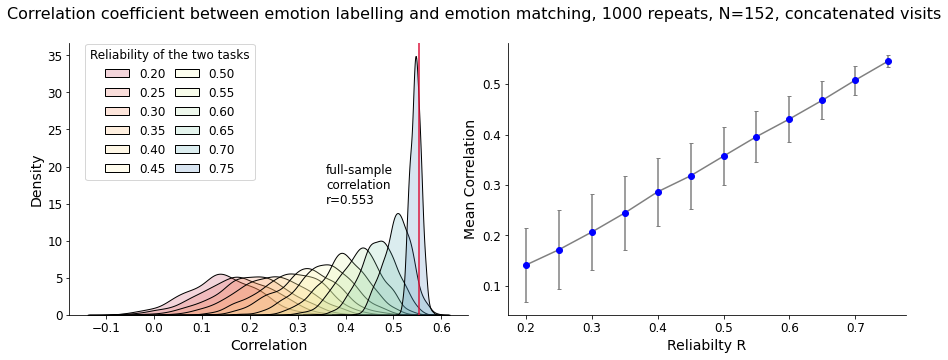

In [77]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between emotion labelling and emotion matching, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_emotion_labelling_concat.groupby(['userID']).sum().corrwith(df_emotion_matching_concat.groupby(['userID']).sum())[0],
                           y_l=15, x_l=0.65
                          )

In [78]:
# save all the arrays
test = 'emotion-labelling-matching'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_emotion_labelling_concat.groupby(['userID']).sum().corrwith(df_emotion_matching_concat.groupby(['userID']).sum()))
        )

---

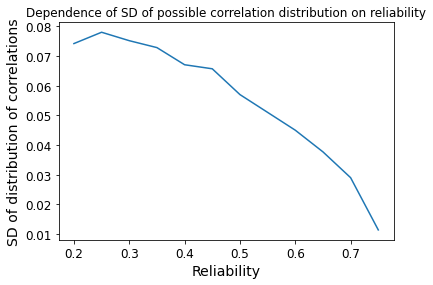

In [79]:
plt.plot(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique(), corr_distribution_array.std(axis=1))

plt.xlabel('Reliability')
plt.ylabel('SD of distribution of correlations')
plt.title('Dependence of SD of possible correlation distribution on reliability')

plt.show()

## Create examples of reliable tasks with low correlation
[top](#top)

## MST vs PIM_MC distributions of correlations
[top](#top)

There is 75 subject in both.


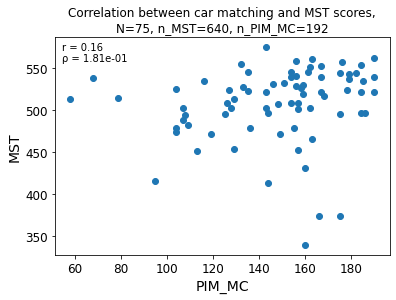

,task,fit,thr,trials needed
0,PIM_MC,hyperbolic,0.20,1
0,PIM_MC,hyperbolic,0.25,2
0,PIM_MC,hyperbolic,0.30,2
0,PIM_MC,hyperbolic,0.35,3
0,PIM_MC,hyperbolic,0.40,4
0,PIM_MC,hyperbolic,0.45,4
0,PIM_MC,hyperbolic,0.50,5
0,PIM_MC,hyperbolic,0.55,7
0,PIM_MC,hyperbolic,0.60,8
0,PIM_MC,hyperbolic,0.65,10


In [80]:
# load data
df_MST = [x for x in dataframe_list if x.task.str.contains('MST').all()][0]
df_PIM_MC = [x for x in dataframe_list if x.task.str.contains('PIM_MC').all()][0]

# take only what's necessary
df_MST = df_MST[['userID', 'correct']]
df_PIM_MC = pd.melt(df_PIM_MC[['userID', 'hobby', 'vice', 'code_name', 'country']], id_vars='userID', value_name='correct')[['userID', 'correct']]

# find overlap
shared_PIM_MC_MST = list(set(df_MST.userID)&set(df_PIM_MC.userID))
print(f"There is {len(shared_PIM_MC_MST)} subject in both.")
N = len(shared_PIM_MC_MST)

# take only overlap
df_MST = df_MST[df_MST["userID"].isin(shared_PIM_MC_MST)].sort_values(by=["userID"]).reset_index(drop=True)
df_PIM_MC = df_PIM_MC[df_PIM_MC["userID"].isin(shared_PIM_MC_MST)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_MST["userID"].value_counts().unique()) == 1
total_n_trials_MST = df_MST["userID"].value_counts().unique()[0]
assert len(df_PIM_MC["userID"].value_counts().unique()) == 1
total_n_trials_PIM_MC = df_PIM_MC["userID"].value_counts().unique()[0]


# plot the correlation
plt.figure()
plt.scatter(df_PIM_MC.groupby(['userID']).sum(), df_MST.groupby(['userID']).sum())

plt.ylabel('MST')
plt.xlabel('PIM_MC')
plt.title(f'Correlation between car matching and MST scores,\nN={len(shared_PIM_MC_MST)}, n_MST={total_n_trials_MST}, n_PIM_MC={total_n_trials_PIM_MC}')
label_correlation(df_PIM_MC.groupby(['userID']).sum().values, 
                  df_MST.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="MST")&(df_needed_trials["trials needed"]<=total_n_trials_MST), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="PIM_MC")&(df_needed_trials["trials needed"]<=total_n_trials_PIM_MC), "thr"].max())

df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)&(df_needed_trials["task"].str.contains('PIM_MC'))]



In [81]:
# extract data from PIM_MC
PIM_MC_all_trials_reshaped = df_PIM_MC["correct"].values.reshape(df_PIM_MC["userID"].unique().size, total_n_trials_pim_mc)

# check that indeed they are the same
for i, user in enumerate(df_PIM_MC["userID"].unique()):
    assert (df_PIM_MC.loc[df_PIM_MC["userID"]==user, "correct"].values == PIM_MC_all_trials_reshaped[i]).all()

# extract data from MST
MST_all_trials_reshaped = df_MST["correct"].values.reshape(df_MST["userID"].unique().size, total_n_trials_mst)

# check that indeed they are the same
for i, user in enumerate(df_MST["userID"].unique()):
    assert (df_MST.loc[df_MST["userID"]==user, "correct"].values == MST_all_trials_reshaped[i]).all()


In [82]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_PIM_MC = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PIM_MC"), "trials needed"].values[0]
    n_mst  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="MST"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            rng_choice.choice(PIM_MC_all_trials_reshaped, size=n_PIM_MC, replace=False, axis=1).sum(axis=1),
            rng_choice.choice(MST_all_trials_reshaped, size=n_mst, replace=False, axis=1).sum(axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 16 thresholds and 1000 iterations.
Process took: 3.92 s which is 0.07 min.


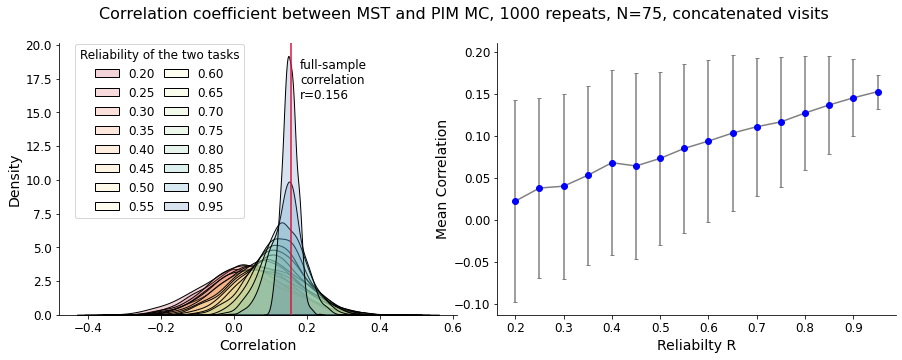

In [83]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between MST and PIM MC, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_MST.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum())[0],
                           y_l=16, x_l=1.16
                          )

In [84]:
# save all the arrays
test = 'MST-PIM-MC'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_MST.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum()))
        )

## PGNG vs PIM_MC distributions of correlations
[top](#top)

There is 134 subject in both.


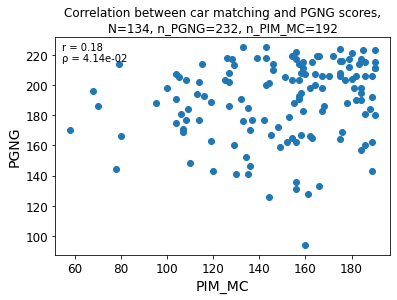

,task,fit,thr,trials needed
0,PIM_MC,hyperbolic,0.20,1
0,PIM_MC,hyperbolic,0.25,2
0,PIM_MC,hyperbolic,0.30,2
0,PIM_MC,hyperbolic,0.35,3
0,PIM_MC,hyperbolic,0.40,4
0,PIM_MC,hyperbolic,0.45,4
0,PIM_MC,hyperbolic,0.50,5
0,PIM_MC,hyperbolic,0.55,7
0,PIM_MC,hyperbolic,0.60,8
0,PIM_MC,hyperbolic,0.65,10


In [85]:
# load data
df_PGNG = [x for x in dataframe_list if x.task.str.contains('PGNG').all()][0]
df_PIM_MC = [x for x in dataframe_list if x.task.str.contains('PIM_MC').all()][0]

# take only what's necessary
df_PGNG = df_PGNG[['userID', 'correct']]
df_PIM_MC = pd.melt(df_PIM_MC[['userID', 'hobby', 'vice', 'code_name', 'country']], id_vars='userID', value_name='correct')[['userID', 'correct']]

# find overlap
shared_PIM_MC_PGNG = list(set(df_PGNG.userID)&set(df_PIM_MC.userID))
print(f"There is {len(shared_PIM_MC_PGNG)} subject in both.")
N = len(shared_PIM_MC_PGNG)

# take only overlap
df_PGNG = df_PGNG[df_PGNG["userID"].isin(shared_PIM_MC_PGNG)].sort_values(by=["userID"]).reset_index(drop=True)
df_PIM_MC = df_PIM_MC[df_PIM_MC["userID"].isin(shared_PIM_MC_PGNG)].sort_values(by=["userID"]).reset_index(drop=True)

# get n trials
assert len(df_PGNG["userID"].value_counts().unique()) == 1
total_n_trials_PGNG = df_PGNG["userID"].value_counts().unique()[0]
assert len(df_PIM_MC["userID"].value_counts().unique()) == 1
total_n_trials_PIM_MC = df_PIM_MC["userID"].value_counts().unique()[0]


# plot the correlation
plt.figure()
plt.scatter(df_PIM_MC.groupby(['userID']).sum(), df_PGNG.groupby(['userID']).sum())

plt.ylabel('PGNG')
plt.xlabel('PIM_MC')
plt.title(f'Correlation between car matching and PGNG scores,\nN={len(shared_PIM_MC_PGNG)}, n_PGNG={total_n_trials_PGNG}, n_PIM_MC={total_n_trials_PIM_MC}')
label_correlation(df_PIM_MC.groupby(['userID']).sum().values, 
                  df_PGNG.groupby(['userID']).sum().values, 
                  plt.gca(), xy=(0.02,0.89))
plt.show()

# get maximum threshold we can sample
max_rel_thr = min(df_needed_trials.loc[(df_needed_trials["task"]=="PGNG")&(df_needed_trials["trials needed"]<=total_n_trials_PGNG), "thr"].max(),
   df_needed_trials.loc[(df_needed_trials["task"]=="PIM_MC")&(df_needed_trials["trials needed"]<=total_n_trials_PIM_MC), "thr"].max())

df_needed_trials.loc[(df_needed_trials["thr"]<=max_rel_thr)&(df_needed_trials["task"].str.contains('PIM_MC'))]



In [86]:
# extract data from PIM_MC
PIM_MC_all_trials_reshaped = df_PIM_MC["correct"].values.reshape(df_PIM_MC["userID"].unique().size, total_n_trials_pim_mc)

# check that indeed they are the same
for i, user in enumerate(df_PIM_MC["userID"].unique()):
    assert (df_PIM_MC.loc[df_PIM_MC["userID"]==user, "correct"].values == PIM_MC_all_trials_reshaped[i]).all()

# extract data from PGNG
PGNG_all_trials_reshaped = df_PGNG["correct"].values.reshape(df_PGNG["userID"].unique().size, total_n_trials_PGNG)

# check that indeed they are the same
for i, user in enumerate(df_PGNG["userID"].unique()):
    assert (df_PGNG.loc[df_PGNG["userID"]==user, "correct"].values == PGNG_all_trials_reshaped[i]).all()


In [87]:
# start the timer
start = time.time()

# how many times sample and correlate
n_corr_repeats = 10**3

corr_distribution_array = np.zeros((len(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()), n_corr_repeats))
print(f"Taking {corr_distribution_array.shape[0]} thresholds and {corr_distribution_array.shape[1]} iterations.")

# for j, thr in enumerate(df_needed_trials.loc[df_needed_trials["thr"]<=max_rel_thr, "thr"].unique()):
for j, thr in enumerate(reliabilities[reliabilities<=max_rel_thr]):
    # get number of trials to reach the given reliability
    n_PIM_MC = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PIM_MC"), "trials needed"].values[0]
    n_PGNG  = df_needed_trials.loc[(df_needed_trials["thr"]==thr)&(df_needed_trials["task"]=="PGNG"), "trials needed"].values[0]

    # sample several times
    for i in range(n_corr_repeats):
        # define state
        rng_choice = np.random.default_rng(i+j) #todo

        # save correlation
        corr_distribution_array[j,i] = np.corrcoef(
            rng_choice.choice(PIM_MC_all_trials_reshaped, size=n_PIM_MC, replace=False, axis=1).sum(axis=1),
            rng_choice.choice(PGNG_all_trials_reshaped, size=n_PGNG, replace=False, axis=1).sum(axis=1)
        )[0,1]
        
print(f"Process took: {time.time() - start:.2f} s which is {(time.time() - start) / 60:.2f} min.")



Taking 15 thresholds and 1000 iterations.
Process took: 3.40 s which is 0.06 min.


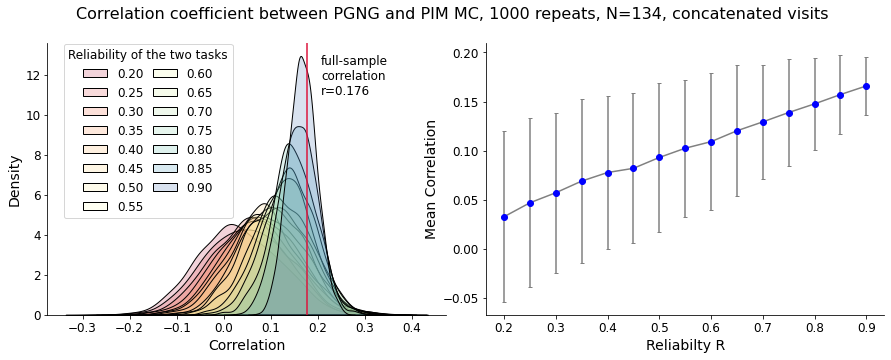

In [88]:
plot_RC_distributions_line(corr_distribution_array, df_needed_trials, max_rel_thr, 
                           f'Correlation coefficient between PGNG and PIM MC, {n_corr_repeats} repeats, N={N}, concatenated visits',
                           legend_position=(.48,1.02),
                           real_corr=df_PGNG.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum())[0],
                           y_l=11, x_l=1.17
                          )

In [89]:
# save all the arrays
test = 'PGNG-PIM-MC'
np.savez(os.path.join(path_meaning, f'{test}_correlation_per_reliability_N{N}_rep{n_corr_repeats}.npz'),
         corr_distribution_array=corr_distribution_array, max_rel_thr=np.array([max_rel_thr]), 
         reliabilities=reliabilities[reliabilities<=max_rel_thr], n_corr_repeats=np.array([n_corr_repeats]), N=np.array([N]),
         real_corr=np.array(df_PGNG.groupby(['userID']).sum().corrwith(df_PIM_MC.groupby(['userID']).sum()))
        )

---

In [90]:
# there is a bug in watermark which prevents it from seeing some "from ... import" imports, see 
# https://github.com/rasbt/watermark/issues/77, so I load it here separately
import lmfit

%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu -iv

Author: Jan Kadlec

Last updated: Mon Jun 26 2023

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

numpy     : 1.19.1
pandas    : 1.2.4
lmfit     : 1.0.3
sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
matplotlib: 3.6.2
seaborn   : 0.11.1



[top](#top)